<a href="https://colab.research.google.com/github/Udhayaprabhas2904/road-damage-detection/blob/main/Final_Year_Project_Minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jan 18 14:33:24 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.5 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pG64eJgzYALtvLcojpXK")
project = rf.workspace("eric-tam-oz6si").project("road-damages-detection")
version = project.version(7)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 138.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Damages-Detection-7 in yolov11:: 100%|██████████| 7024/7024 [00:00<00:00, 8011.88it/s]


In [6]:
dataset.location

'/content/Road-Damages-Detection-7'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [8]:
!yolo task=detect mode=train \
data={dataset.location}/data.yaml \
model=yolo11n.pt \
epochs=80 \
imgsz=640 \
batch=8 \
device=0 \
cache=True \
workers=8


Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Road-Damages-Detection-7/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

In [9]:
!ls -l /content/runs/detect/train/

total 6816
-rw-r--r-- 1 root root   1573 Jan 18 14:34 args.yaml
-rw-r--r-- 1 root root 271702 Jan 18 15:55 BoxF1_curve.png
-rw-r--r-- 1 root root 226414 Jan 18 15:55 BoxP_curve.png
-rw-r--r-- 1 root root 166897 Jan 18 15:55 BoxPR_curve.png
-rw-r--r-- 1 root root 225186 Jan 18 15:55 BoxR_curve.png
-rw-r--r-- 1 root root 190138 Jan 18 15:55 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 146719 Jan 18 15:55 confusion_matrix.png
-rw-r--r-- 1 root root 120666 Jan 18 14:35 labels.jpg
-rw-r--r-- 1 root root  14806 Jan 18 15:55 results.csv
-rw-r--r-- 1 root root 250243 Jan 18 15:55 results.png
-rw-r--r-- 1 root root 349228 Jan 18 14:35 train_batch0.jpg
-rw-r--r-- 1 root root 405140 Jan 18 14:35 train_batch1.jpg
-rw-r--r-- 1 root root 415178 Jan 18 15:45 train_batch21140.jpg
-rw-r--r-- 1 root root 307426 Jan 18 15:45 train_batch21141.jpg
-rw-r--r-- 1 root root 327884 Jan 18 15:45 train_batch21142.jpg
-rw-r--r-- 1 root root 445030 Jan 18 14:35 train_batch2.jpg
-rw-r--r-- 1 root root 5244

**Step # 05 Examine Training Results**

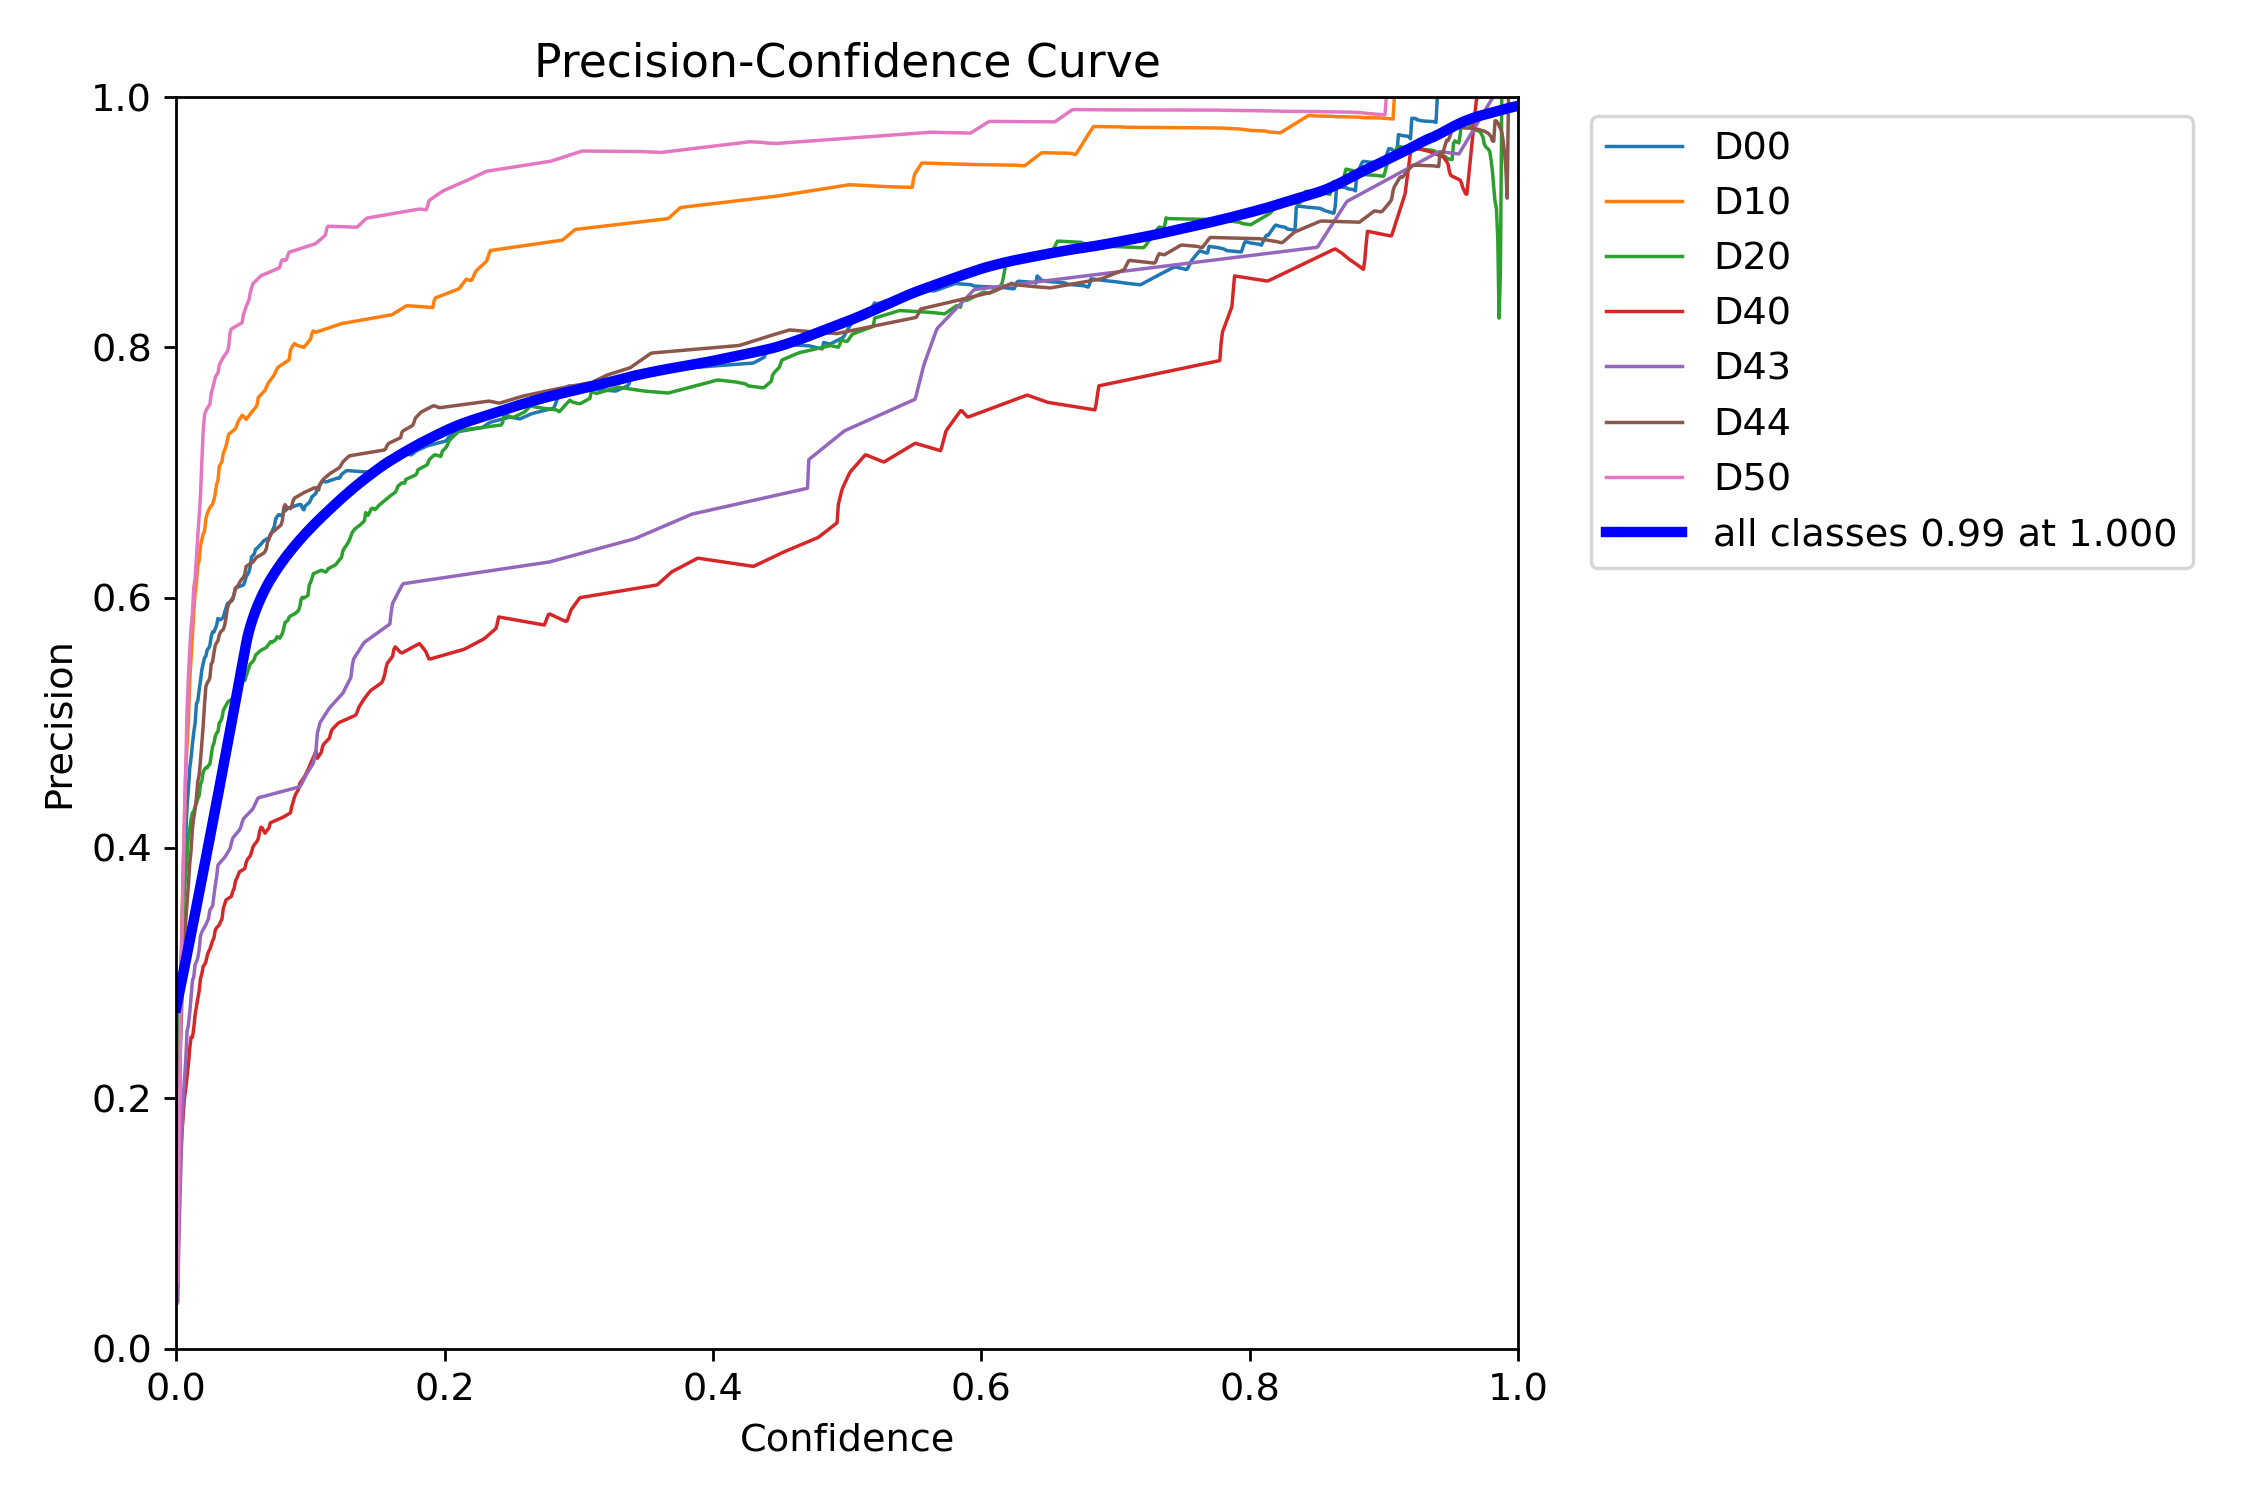

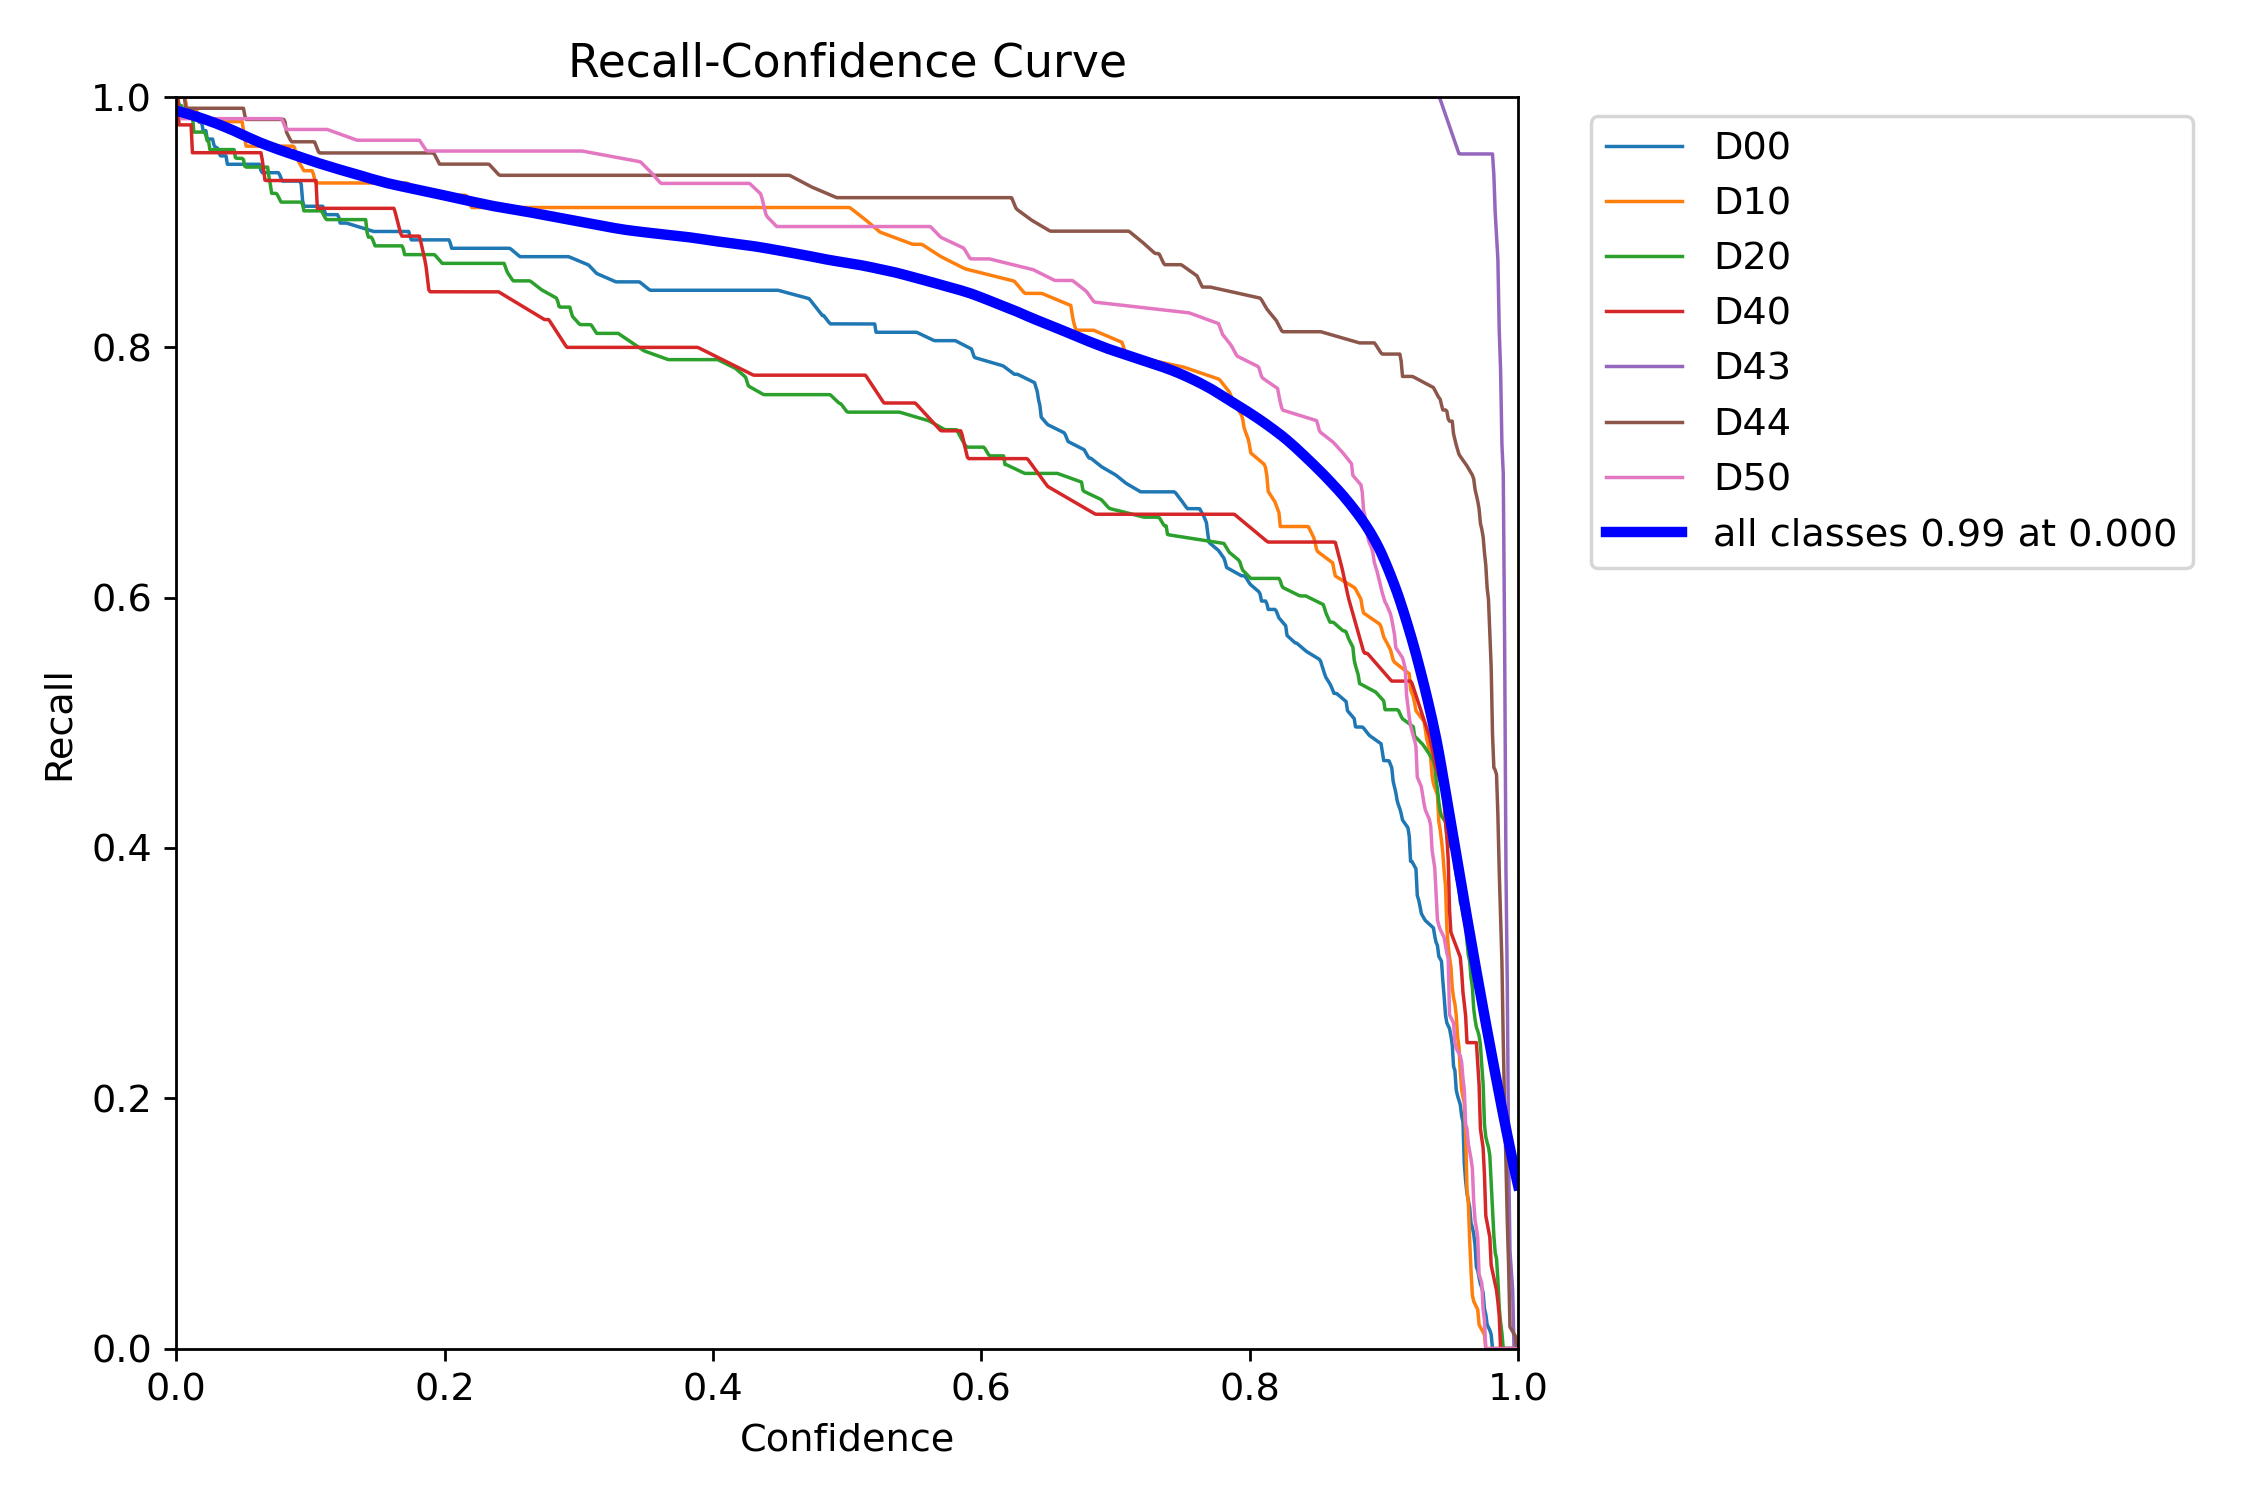

In [10]:
from IPython.display import Image, display

base = "/content/runs/detect/train"

display(Image(f"{base}/BoxP_curve.png", width=600))
display(Image(f"{base}/BoxR_curve.png", width=600))


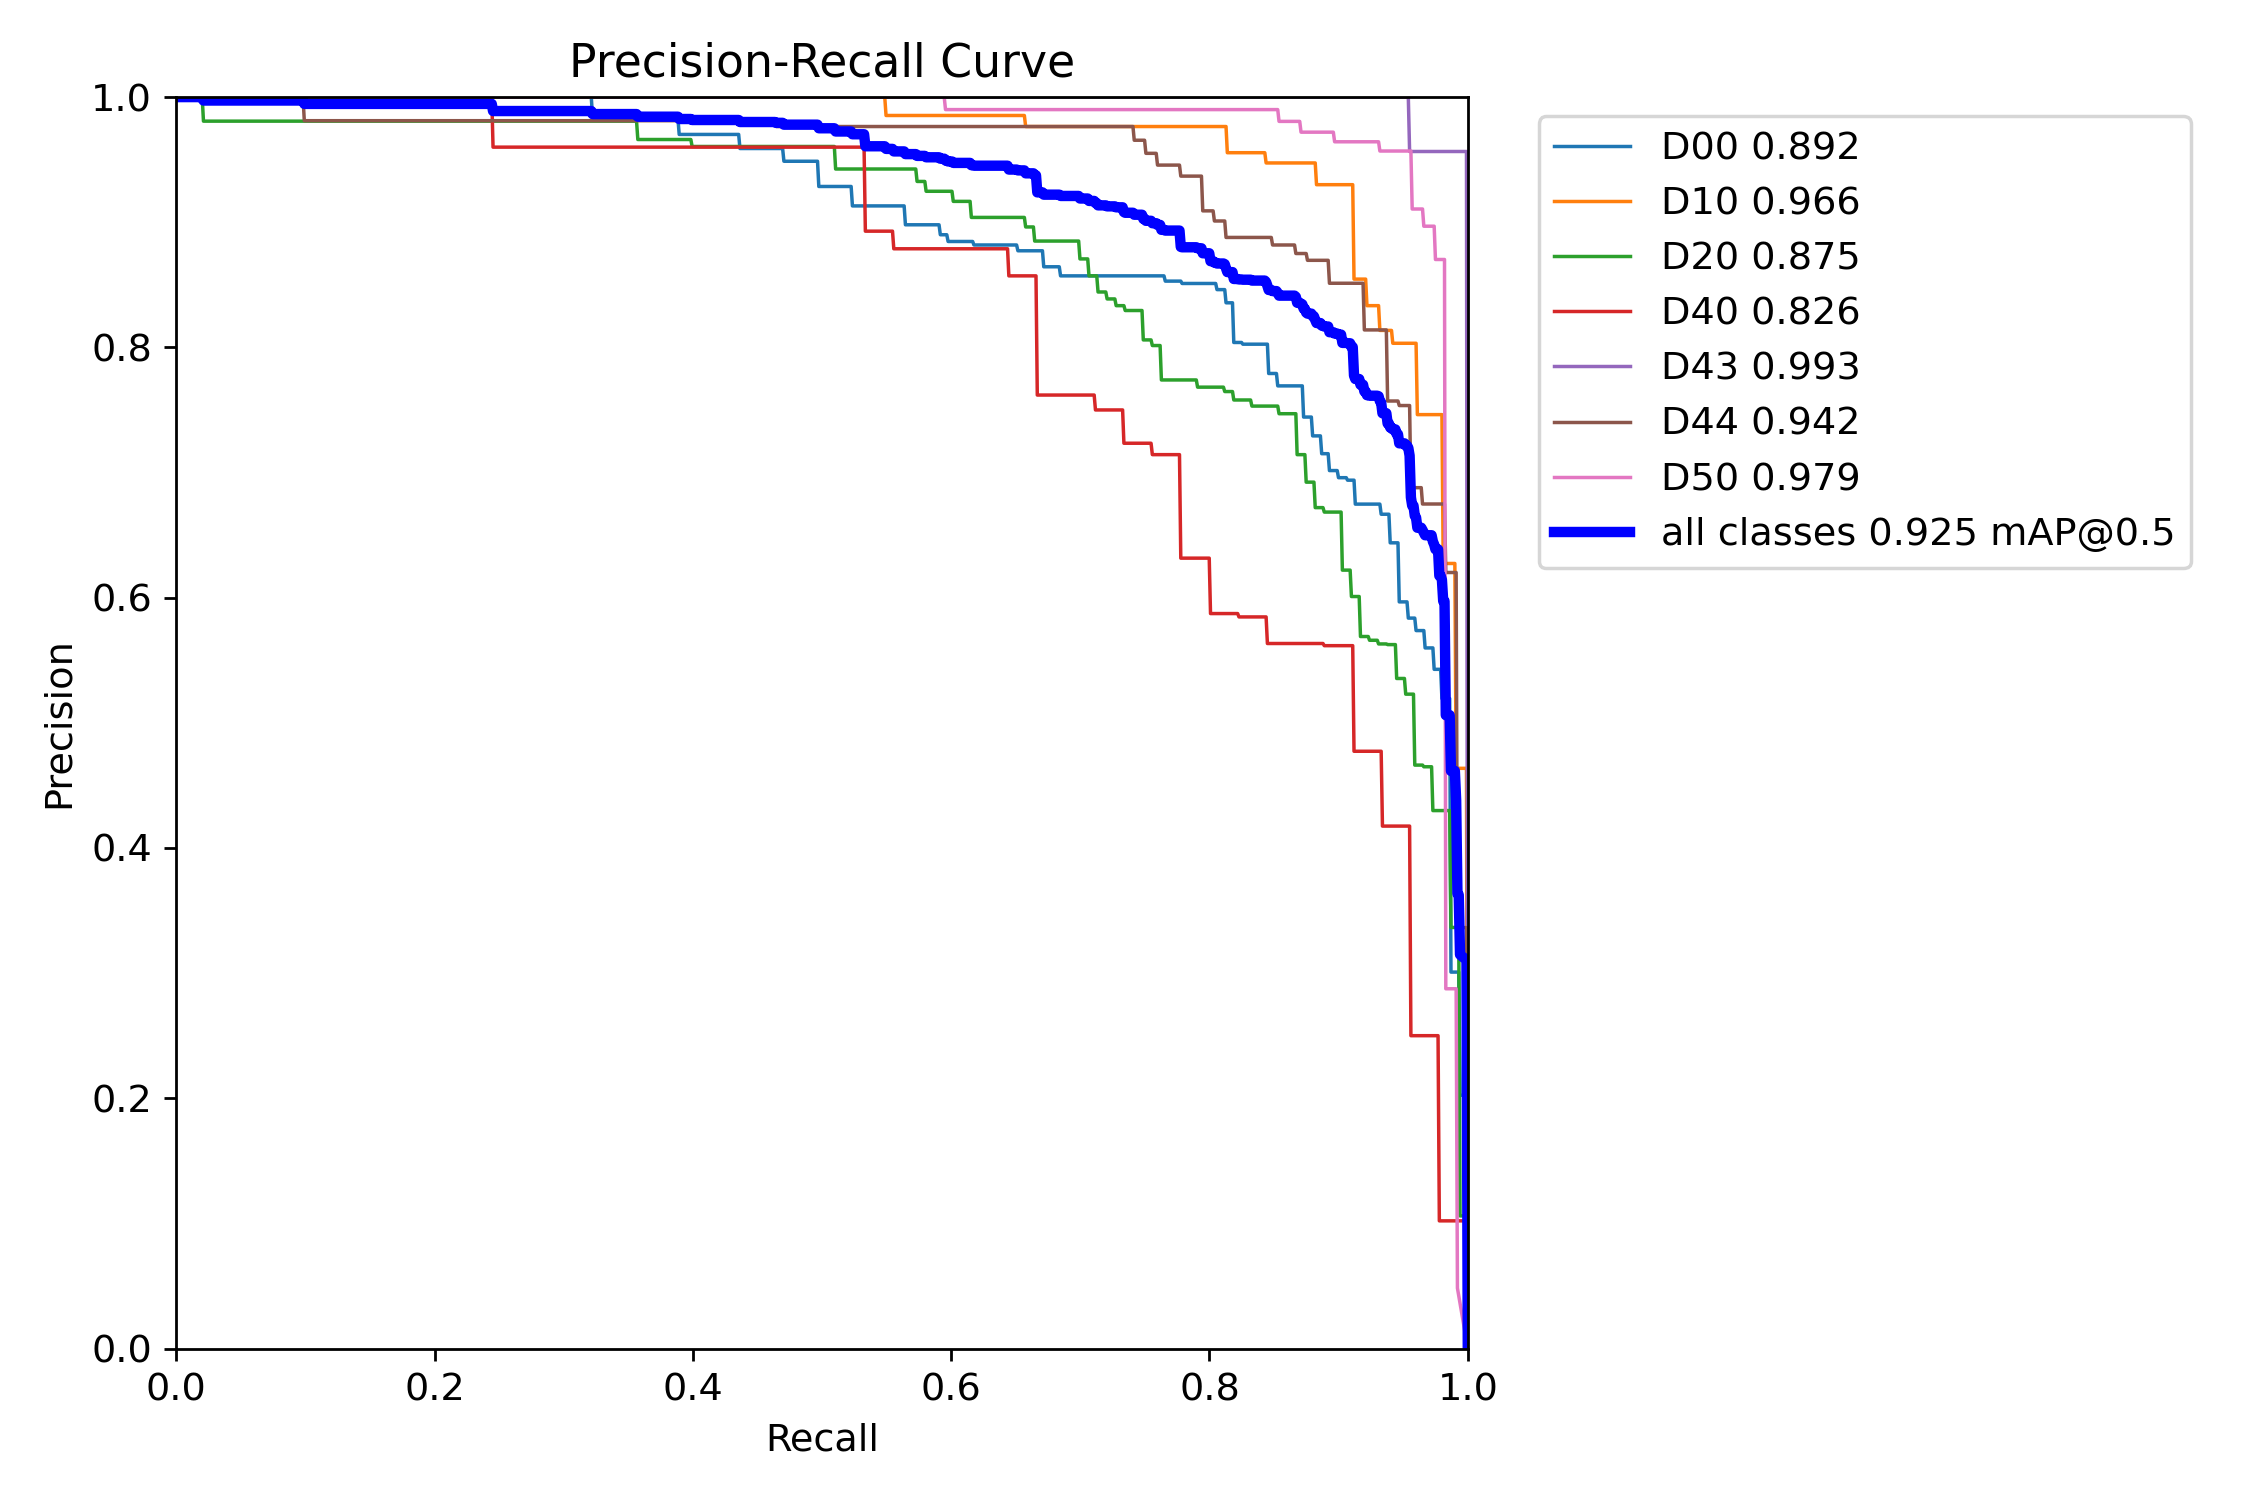

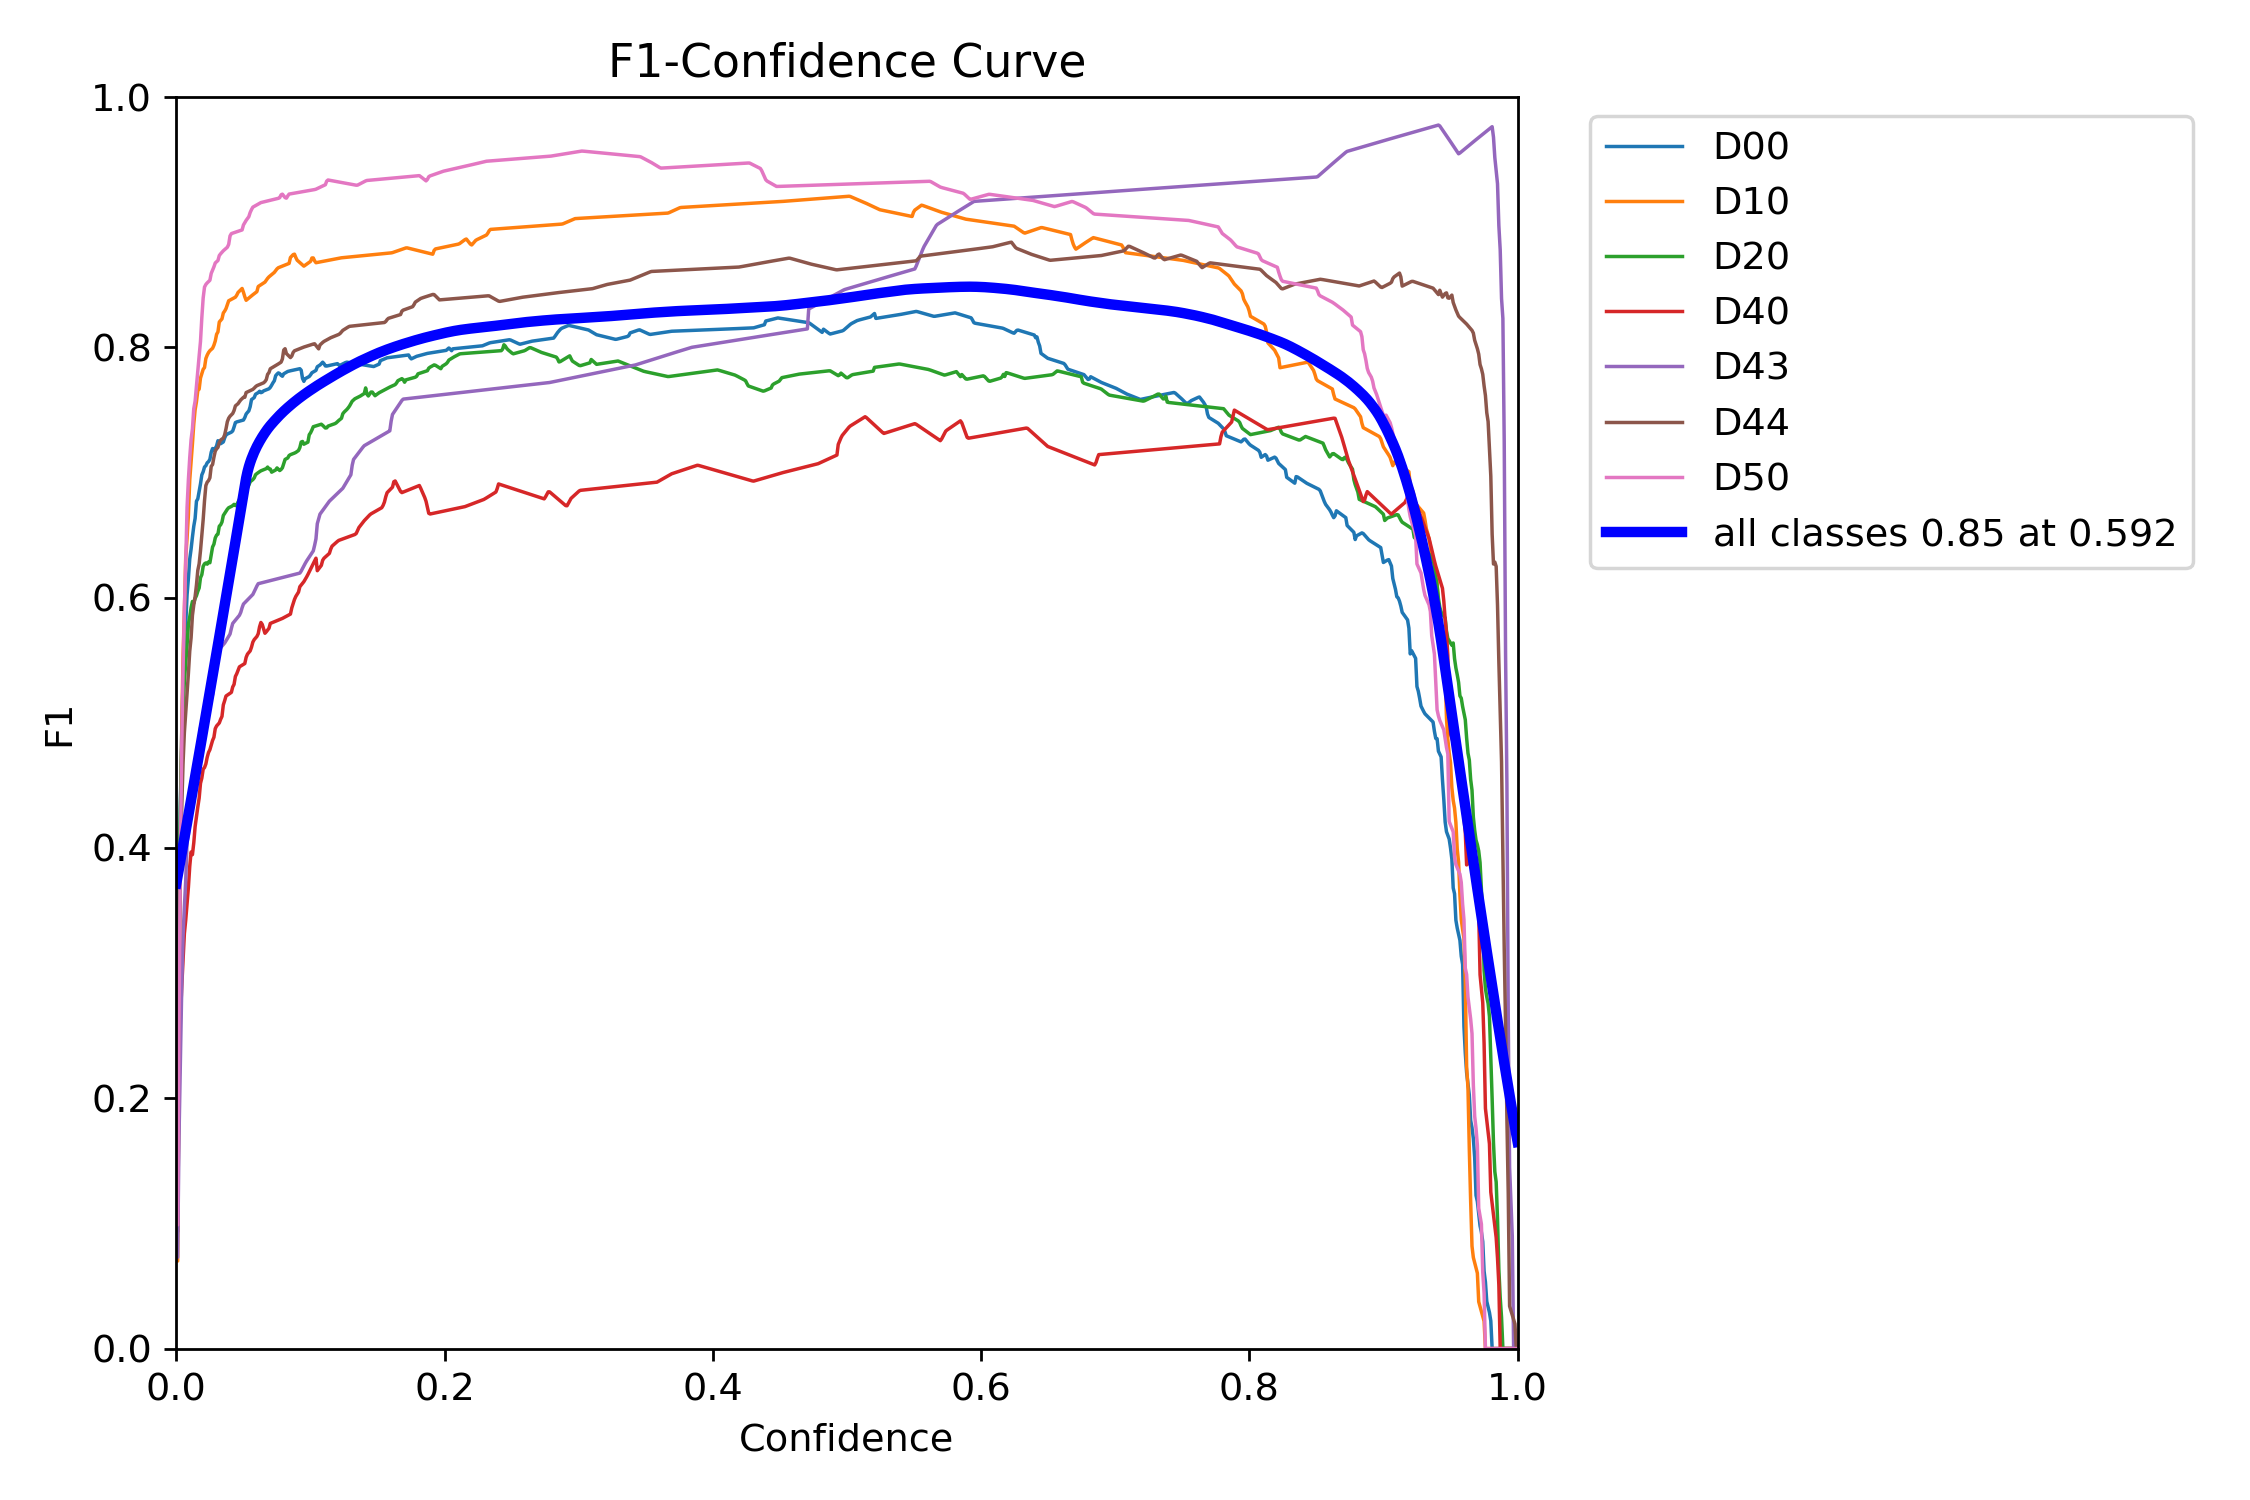

In [11]:
display(Image(f"{base}/BoxPR_curve.png", width=600))
display(Image(f"{base}/BoxF1_curve.png", width=600))

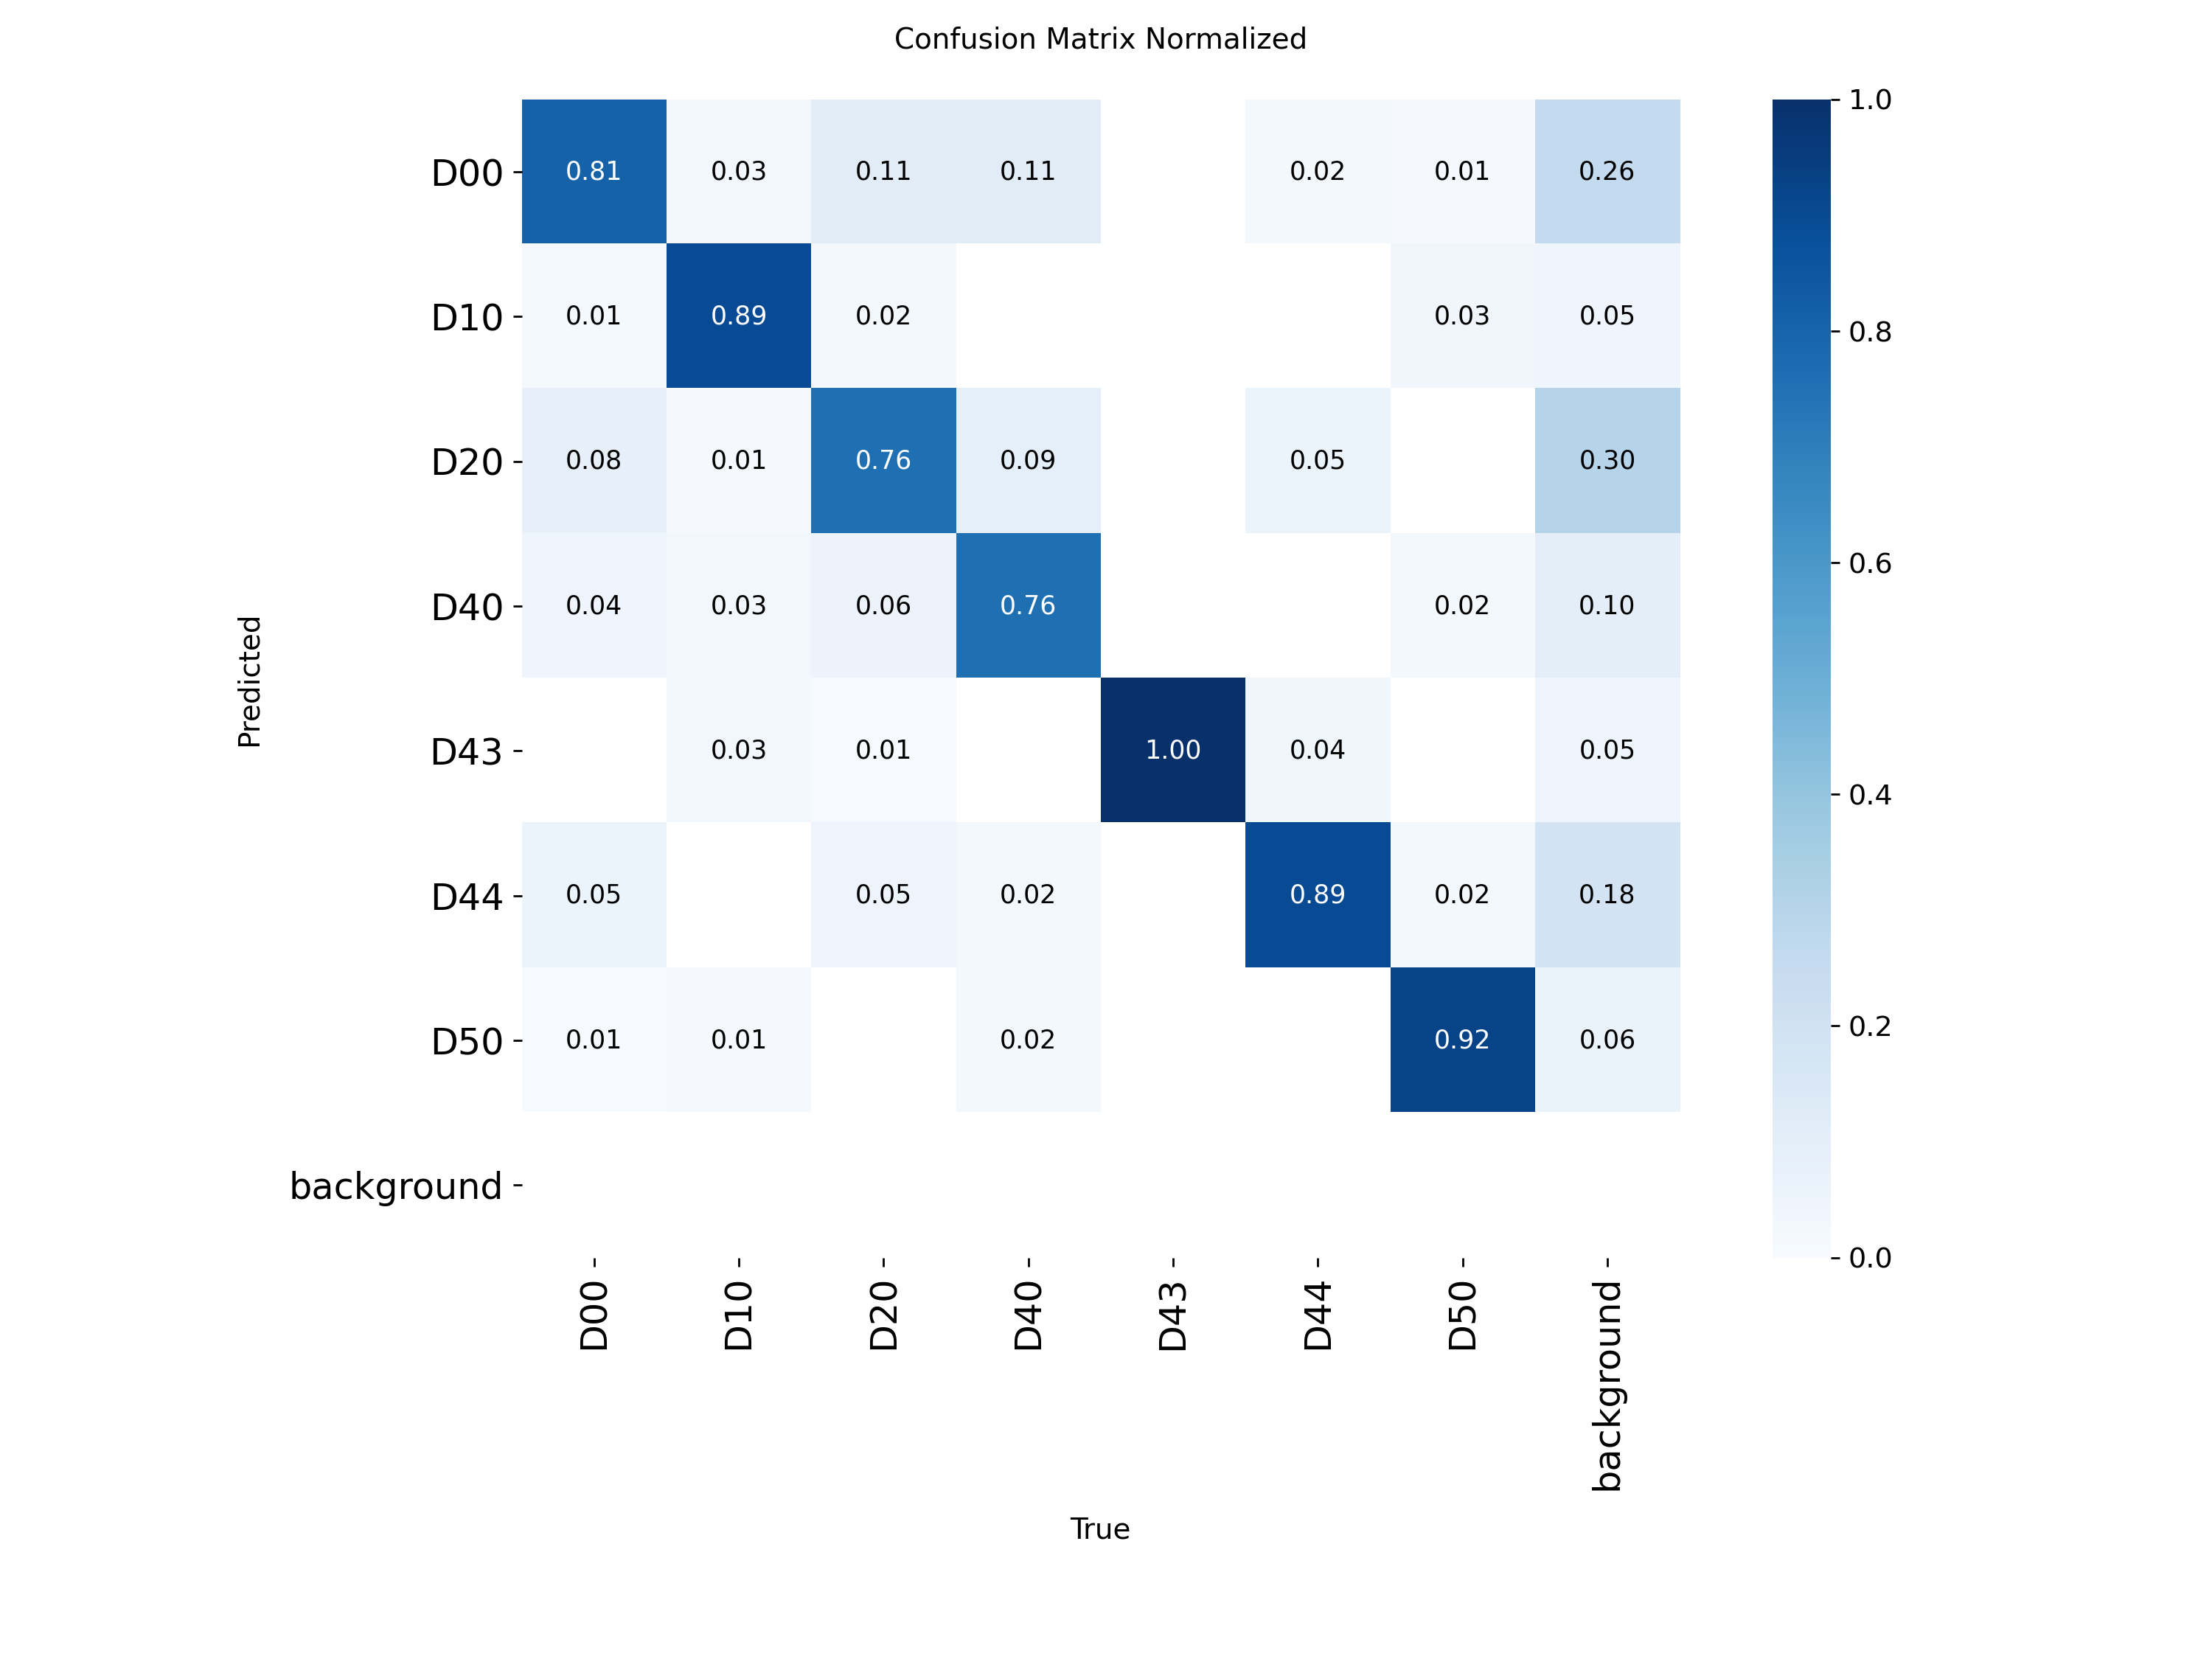

In [12]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

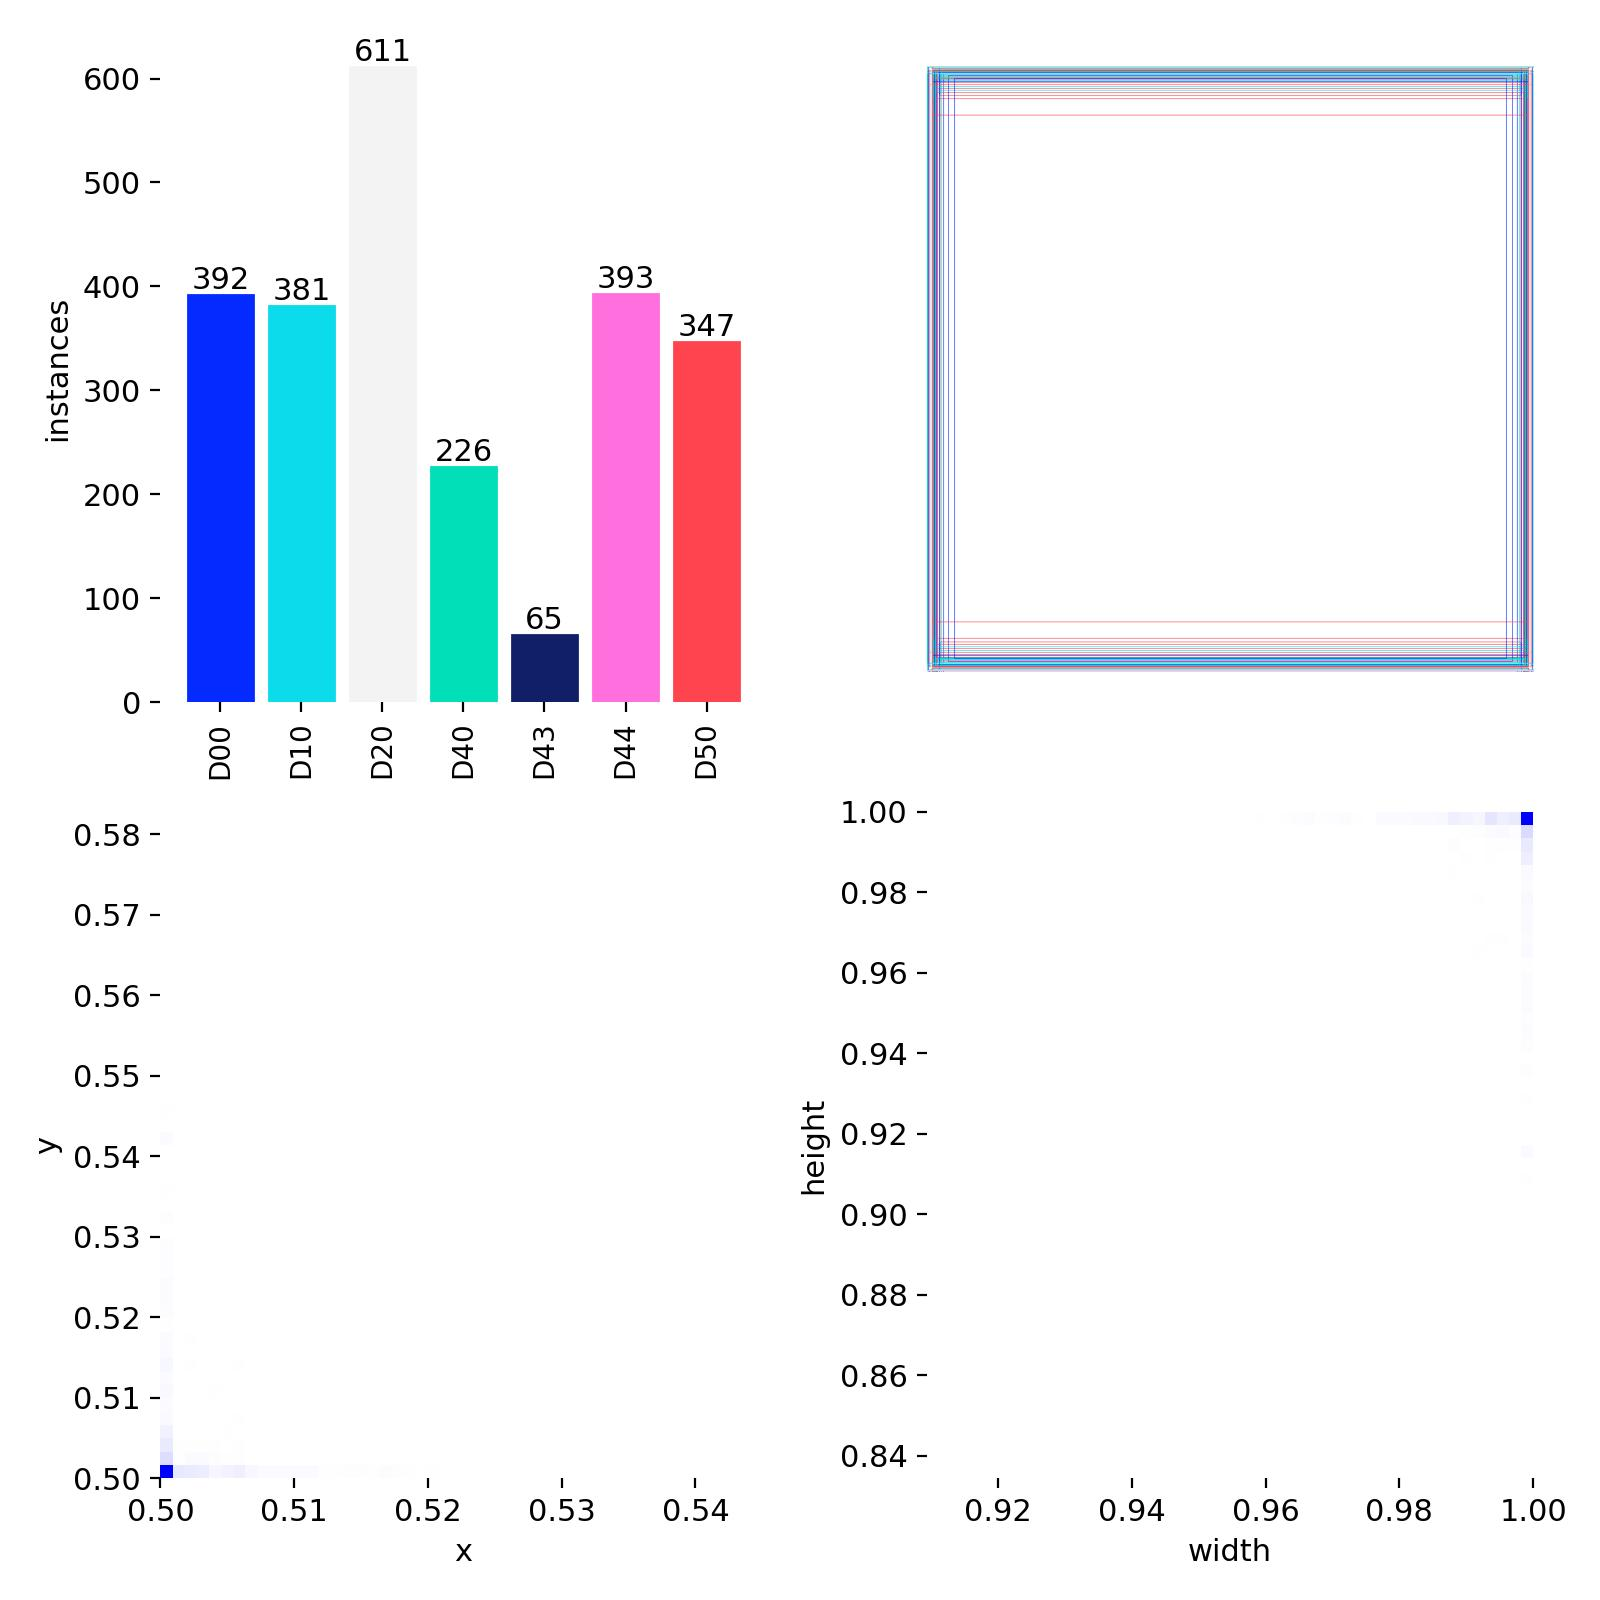

In [13]:
Image("/content/runs/detect/train/labels.jpg", width=600)

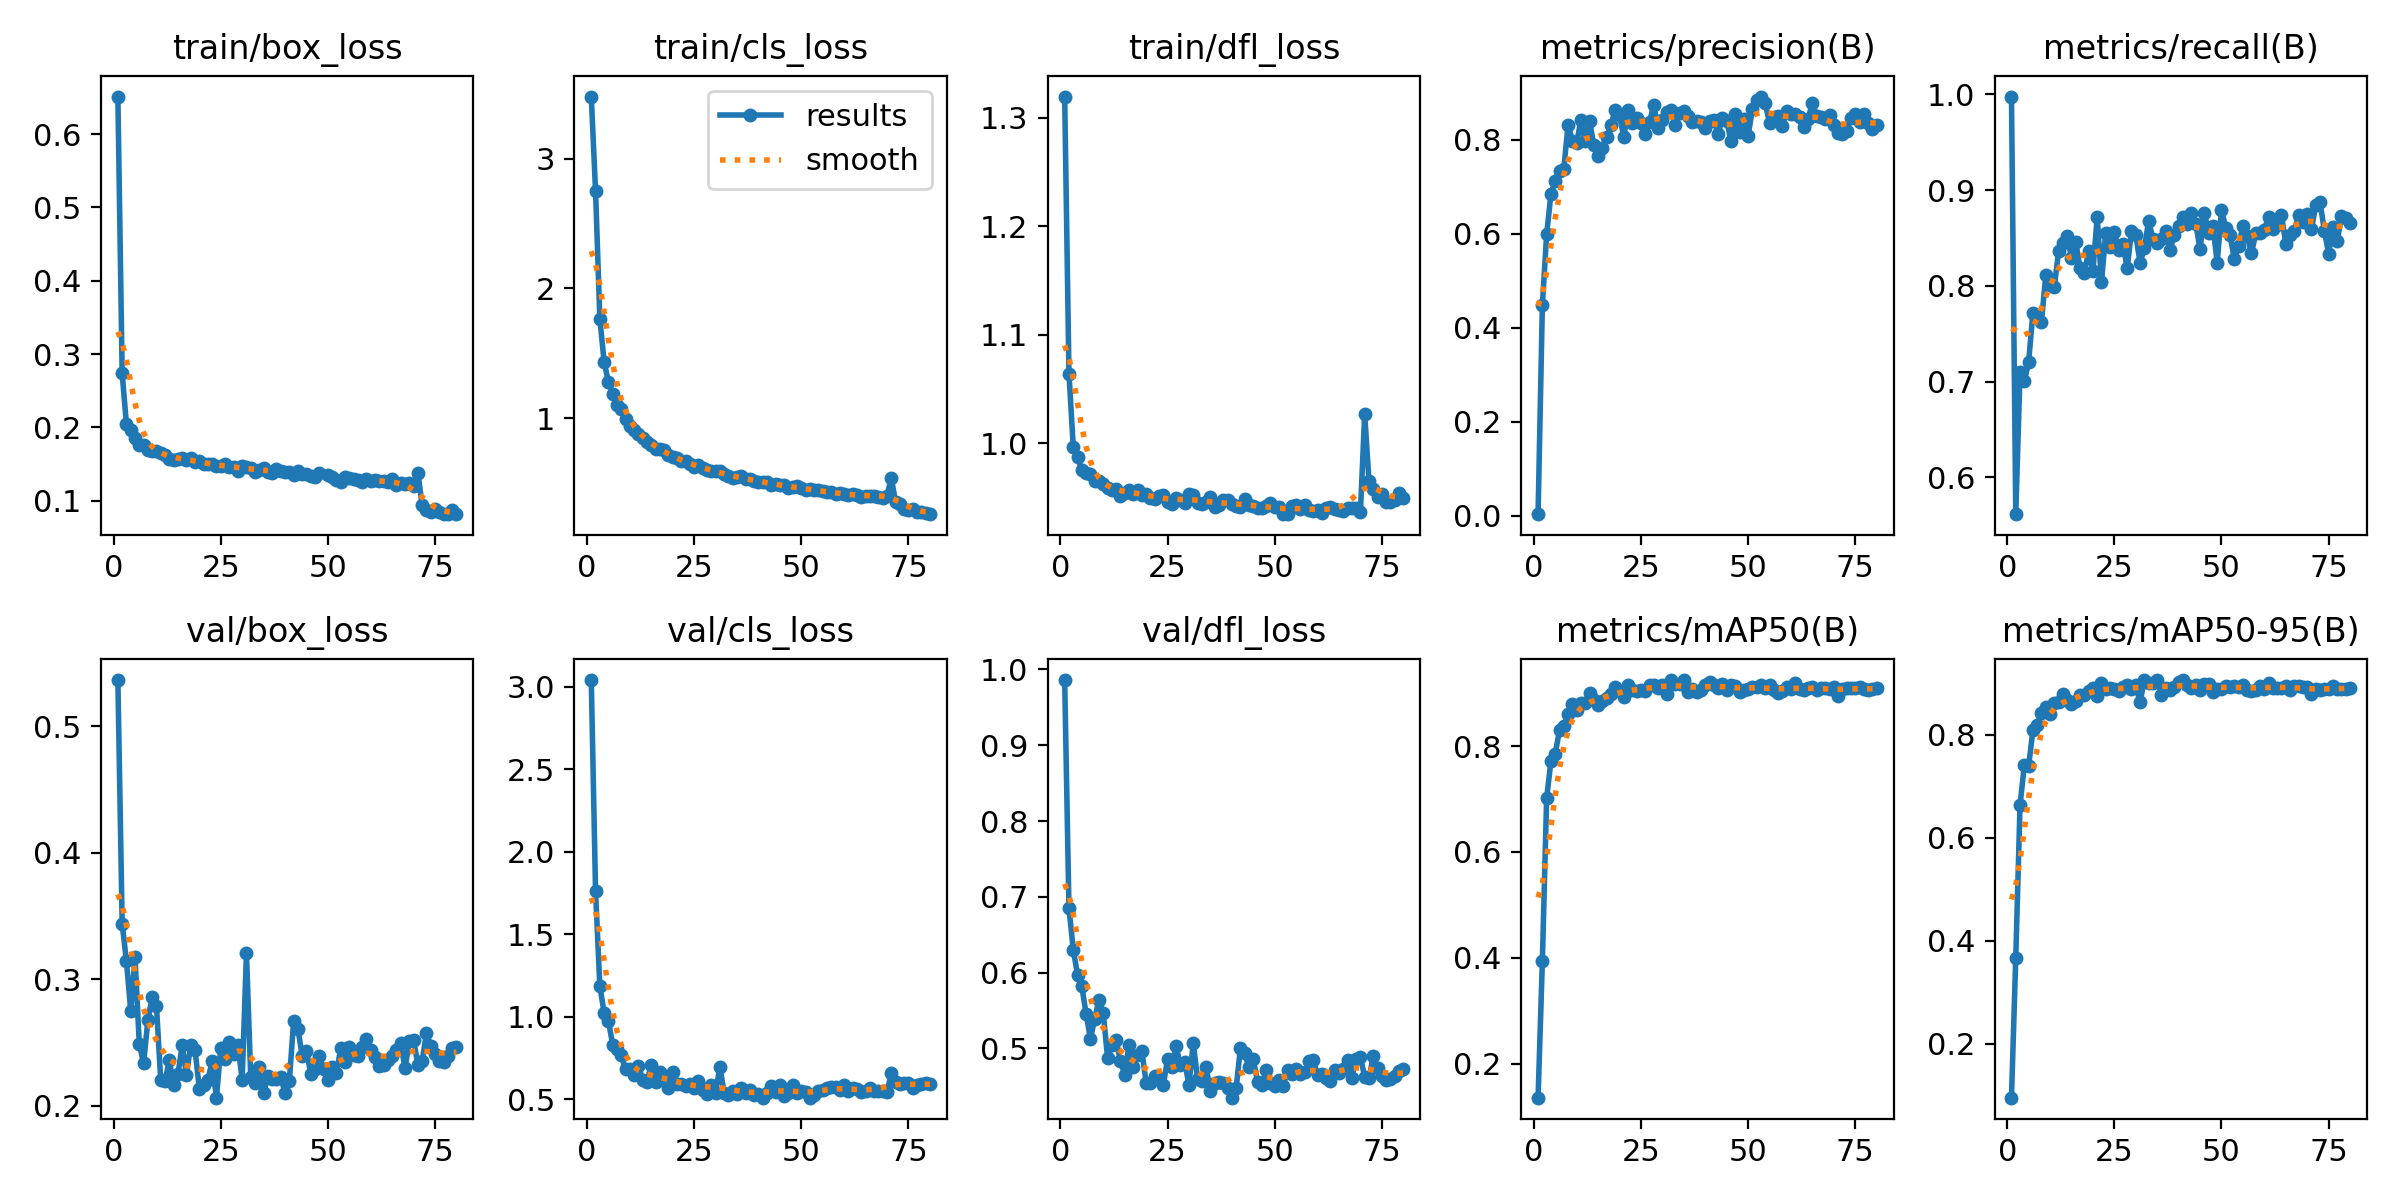

In [14]:
Image("/content/runs/detect/train/results.png", width=600)

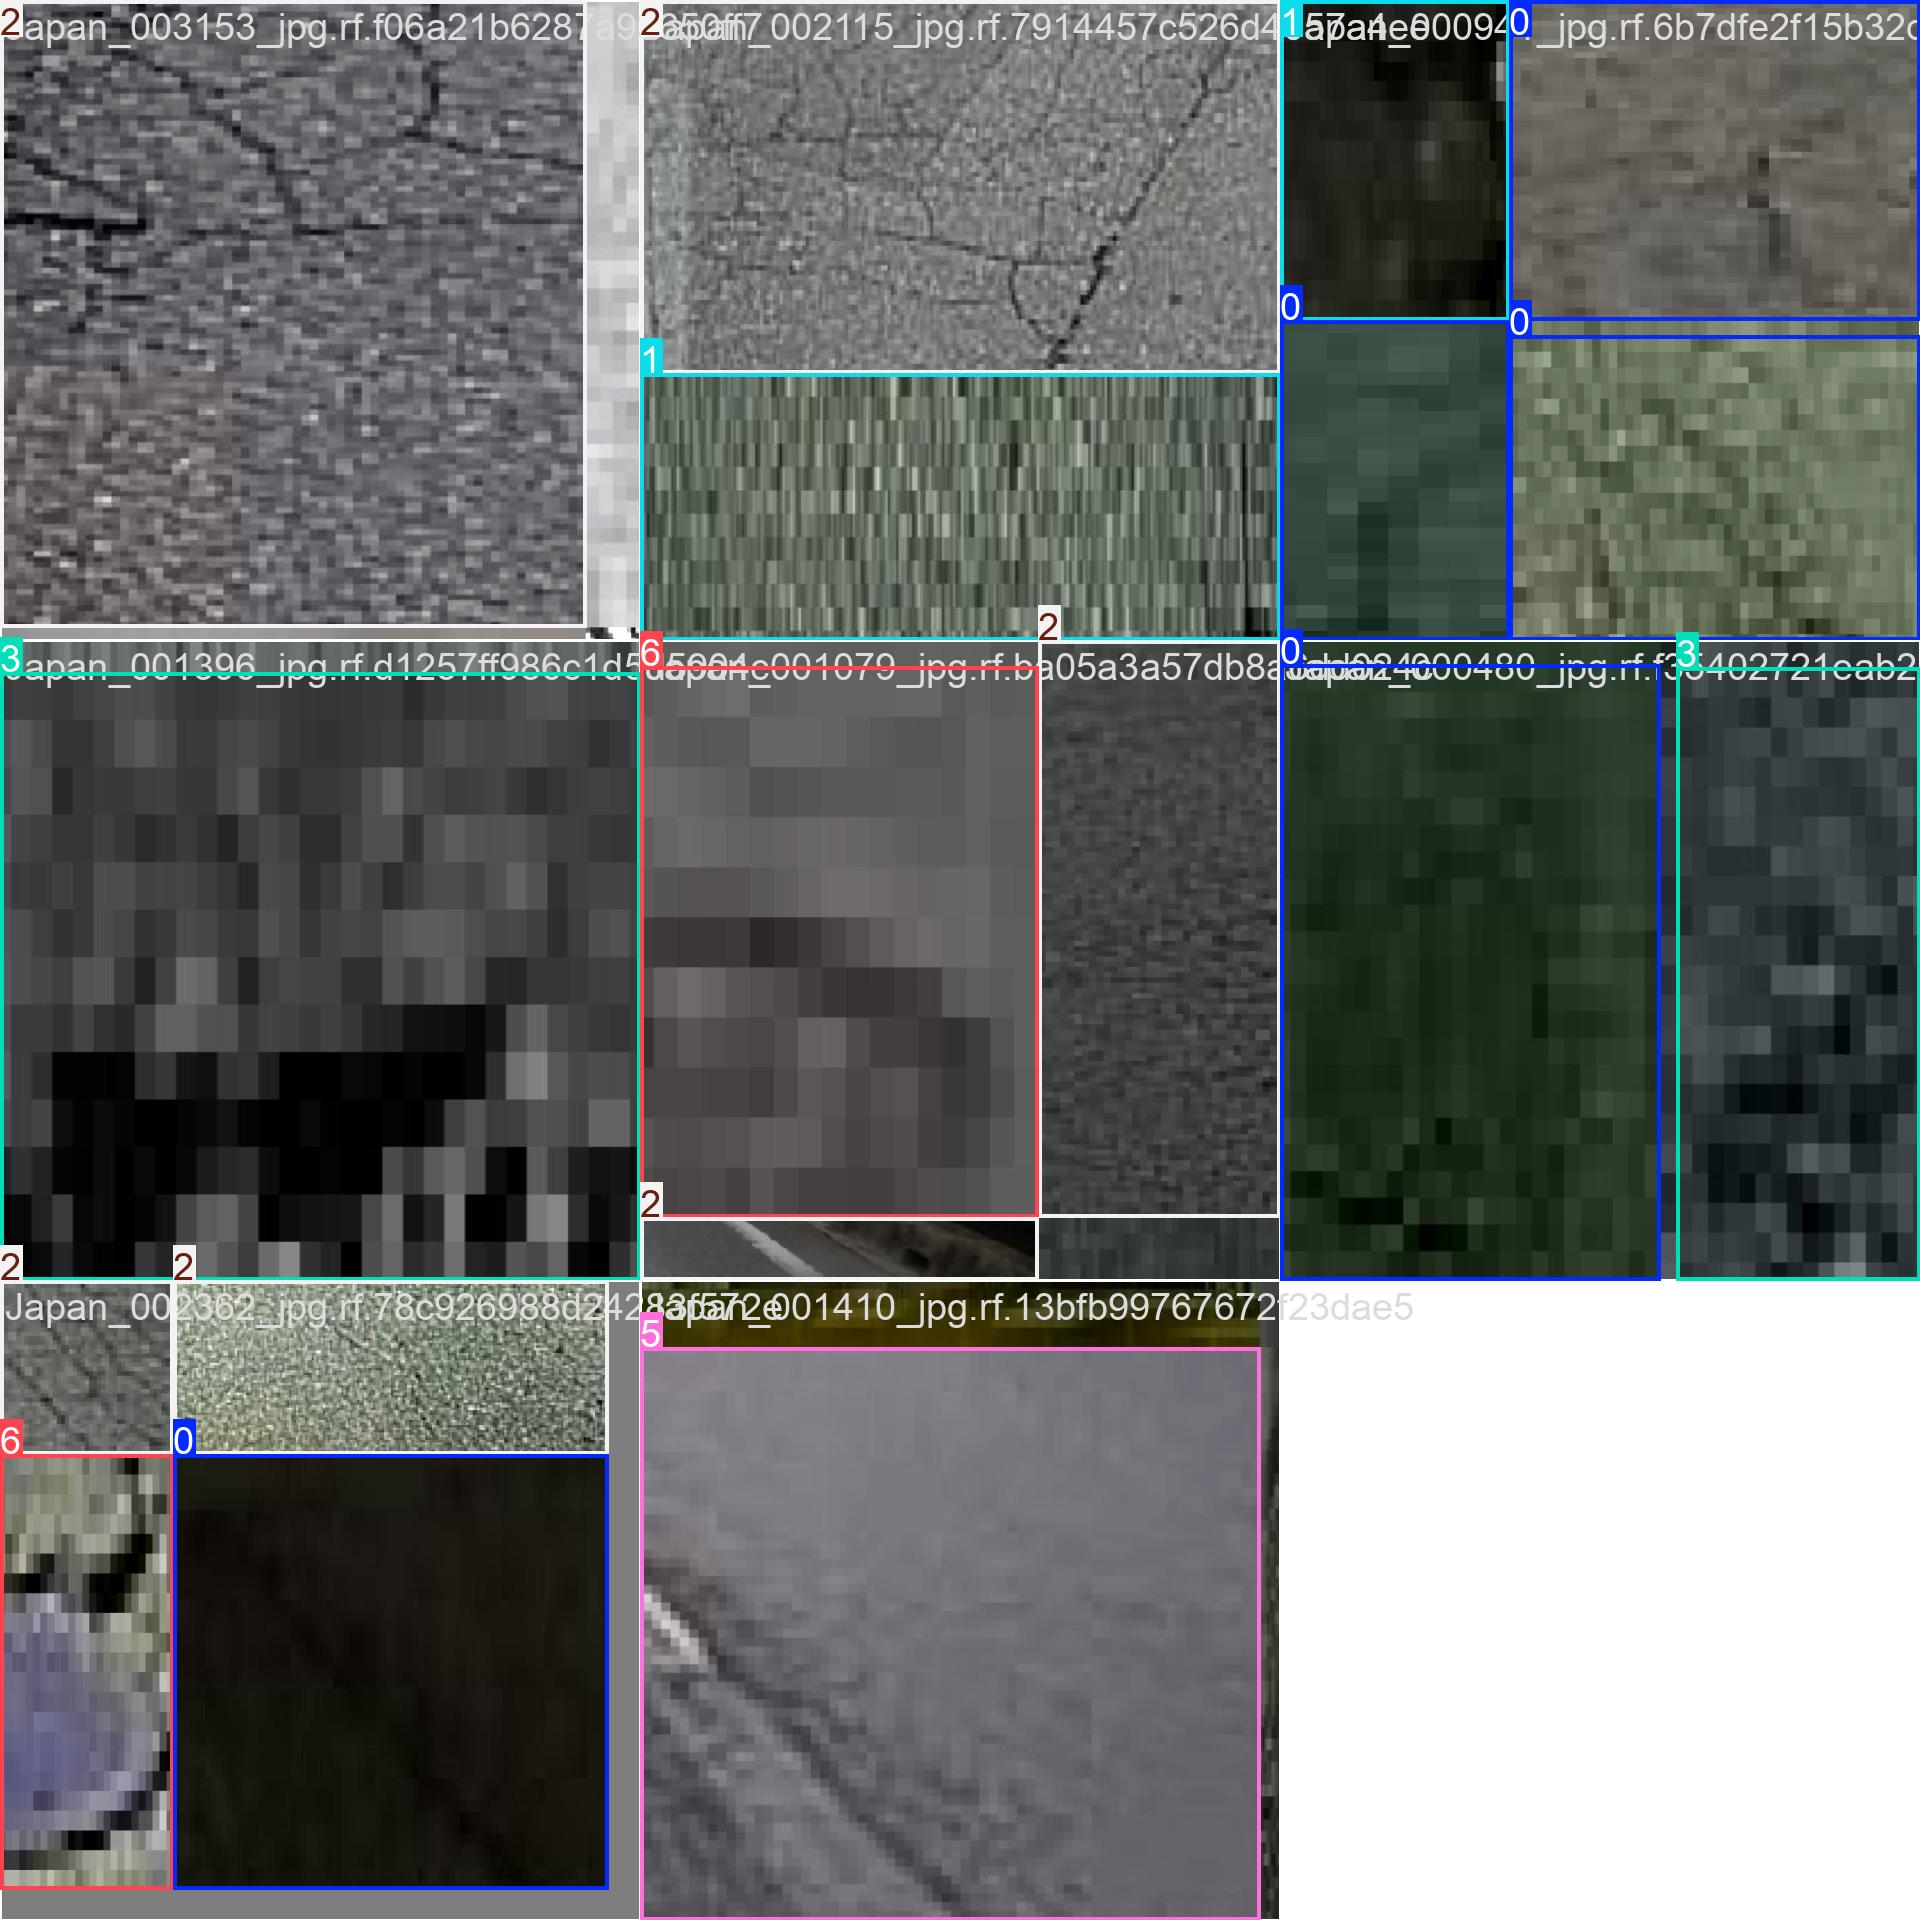

In [15]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

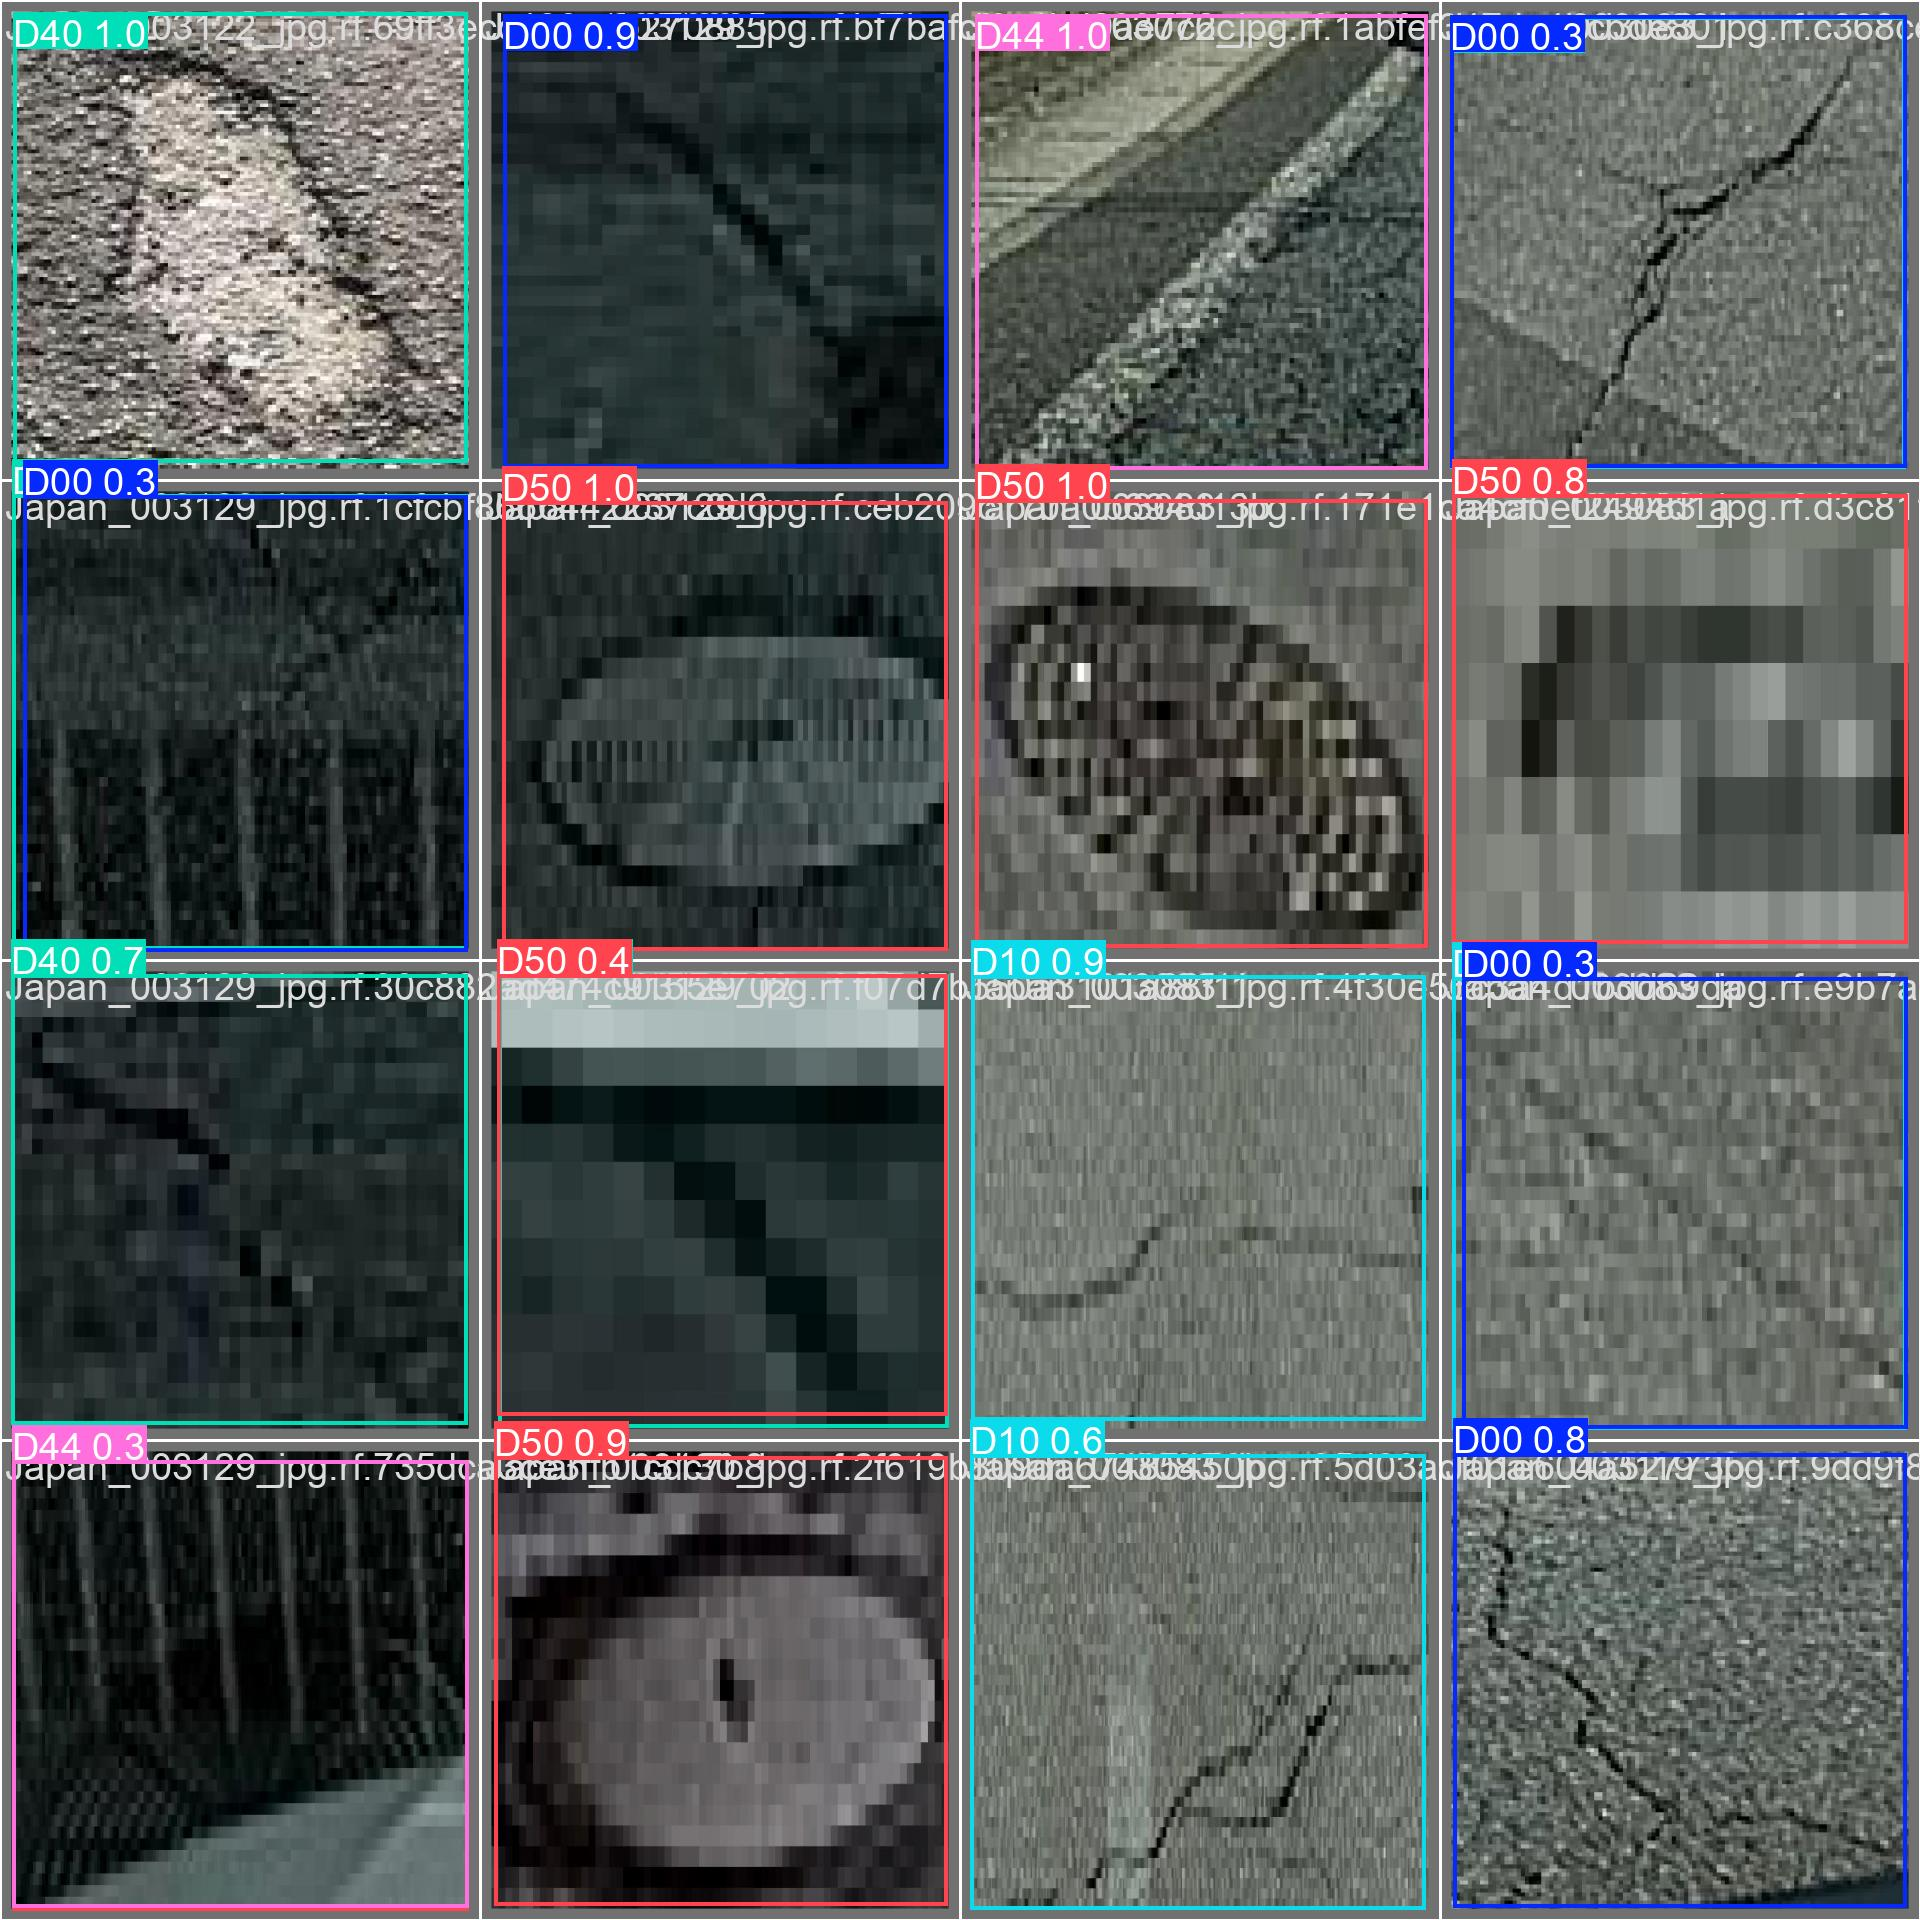

In [16]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

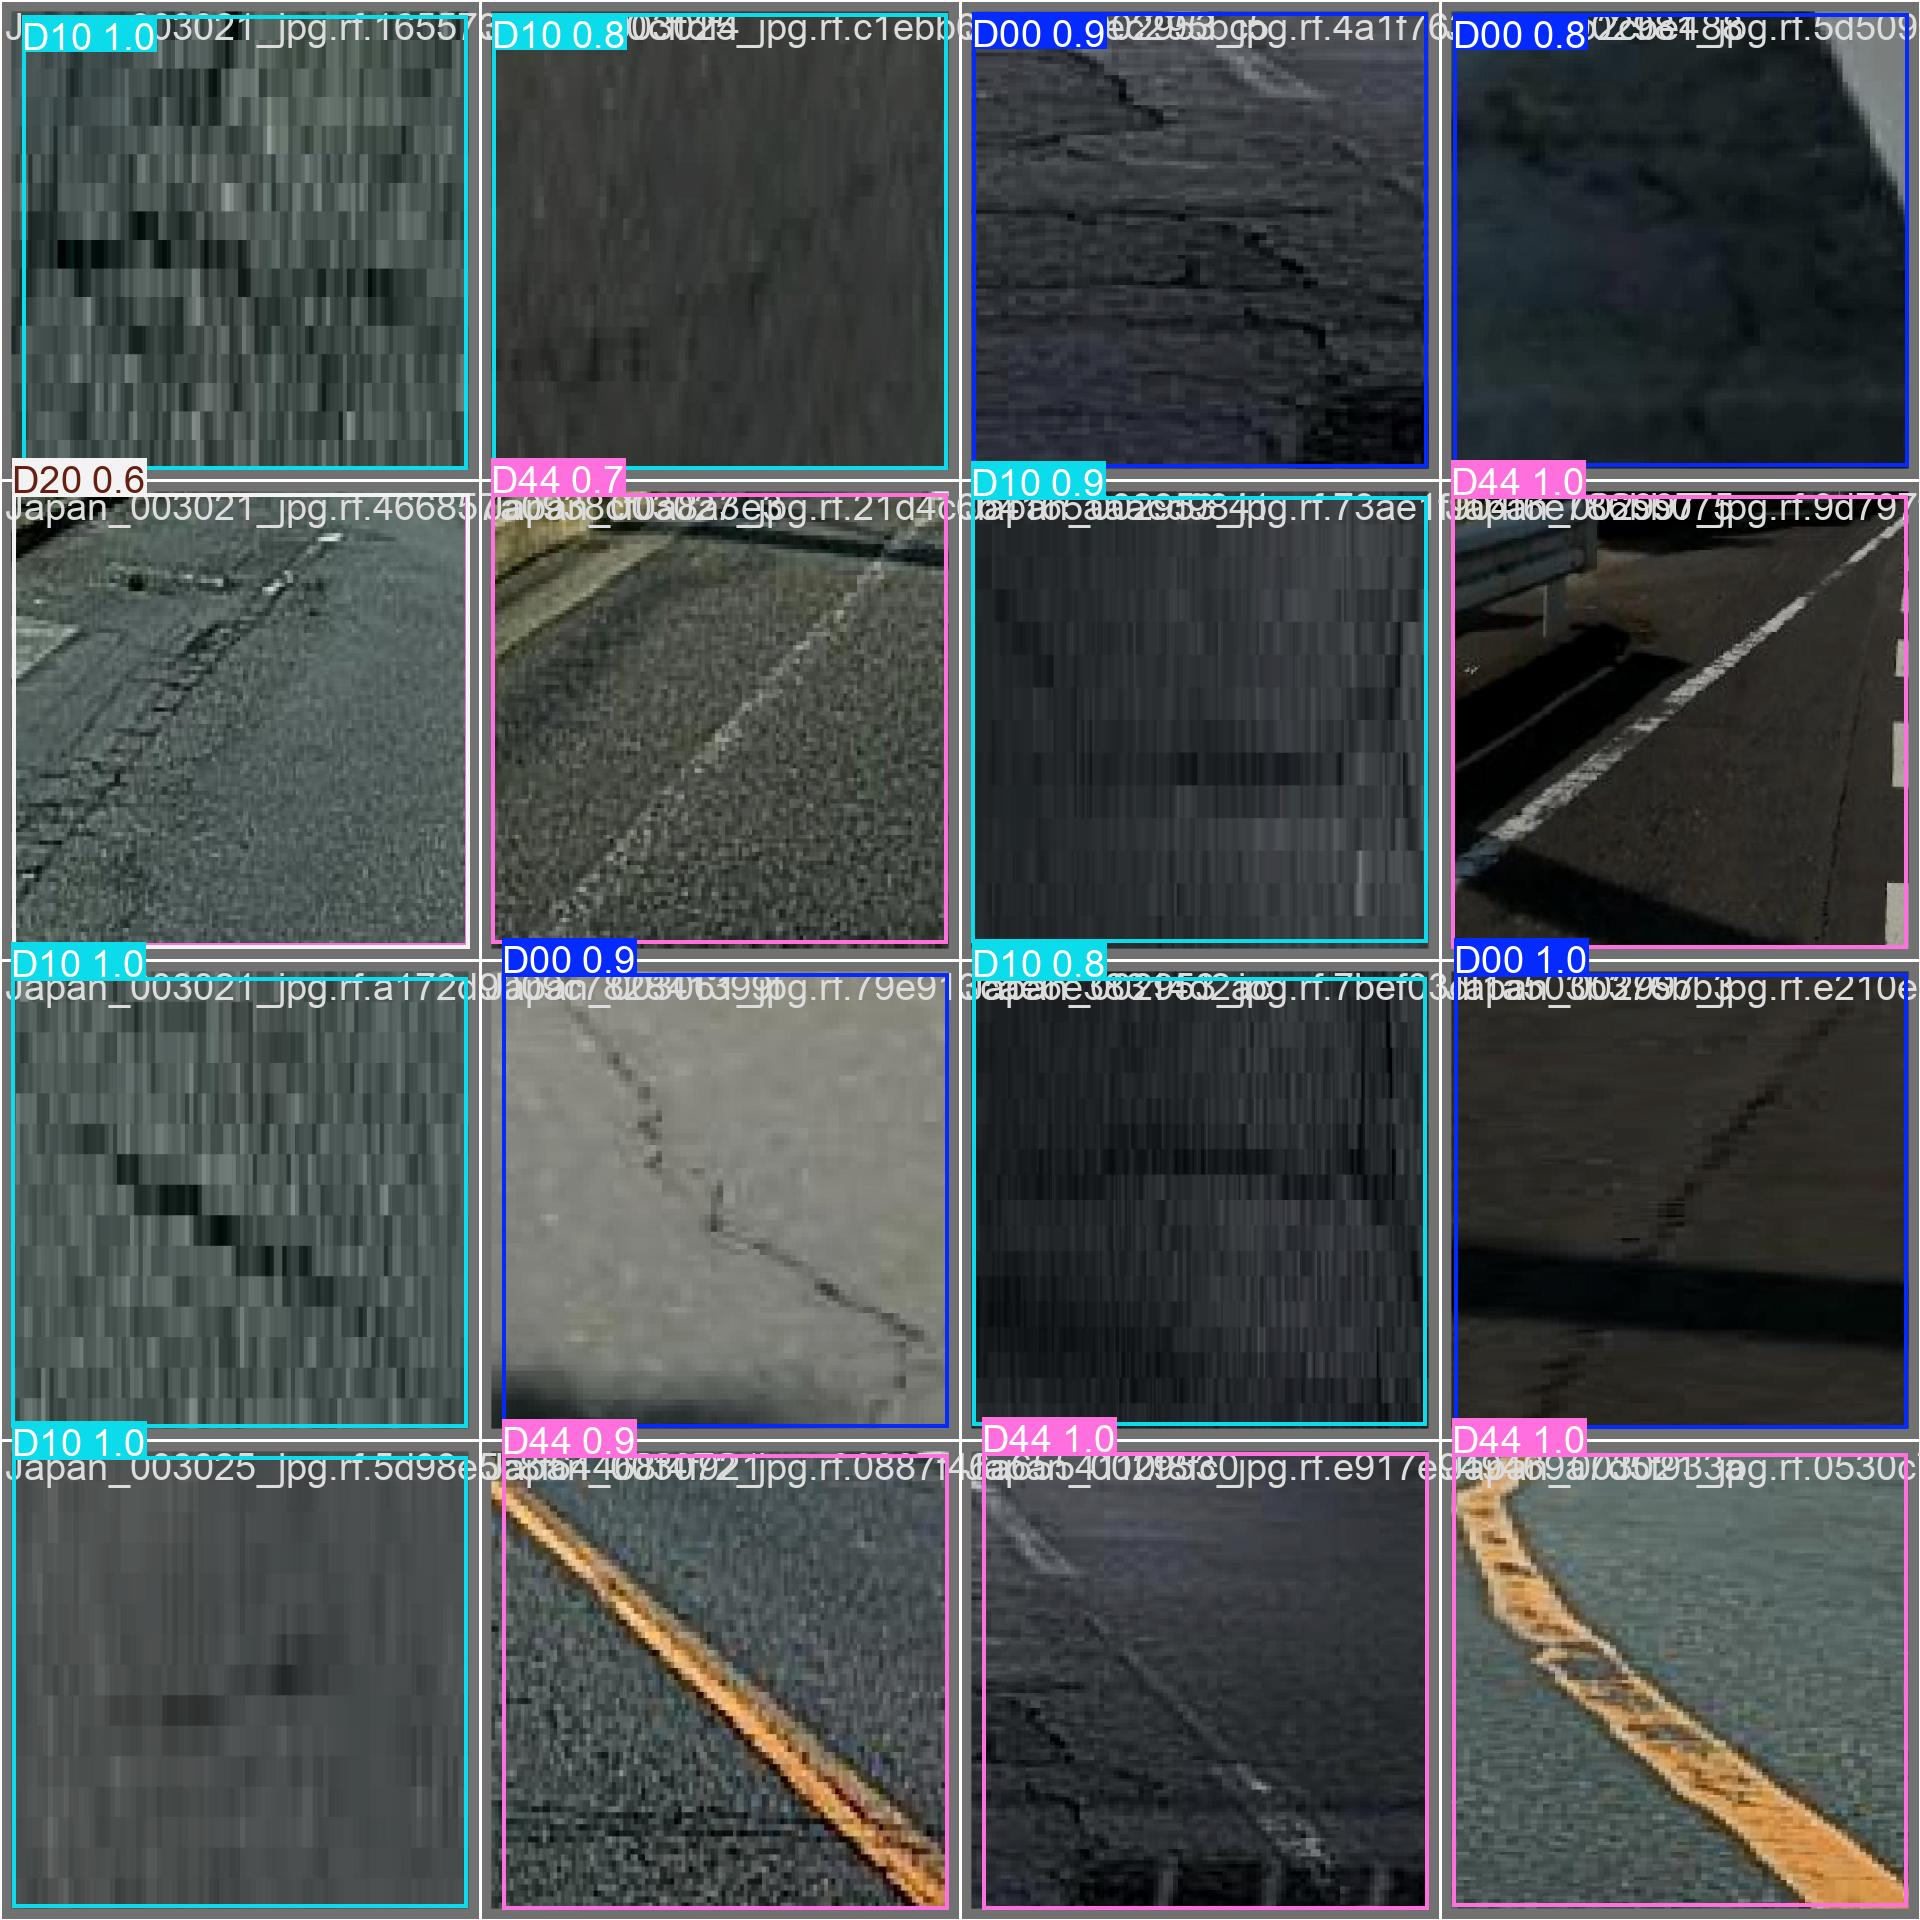

In [17]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

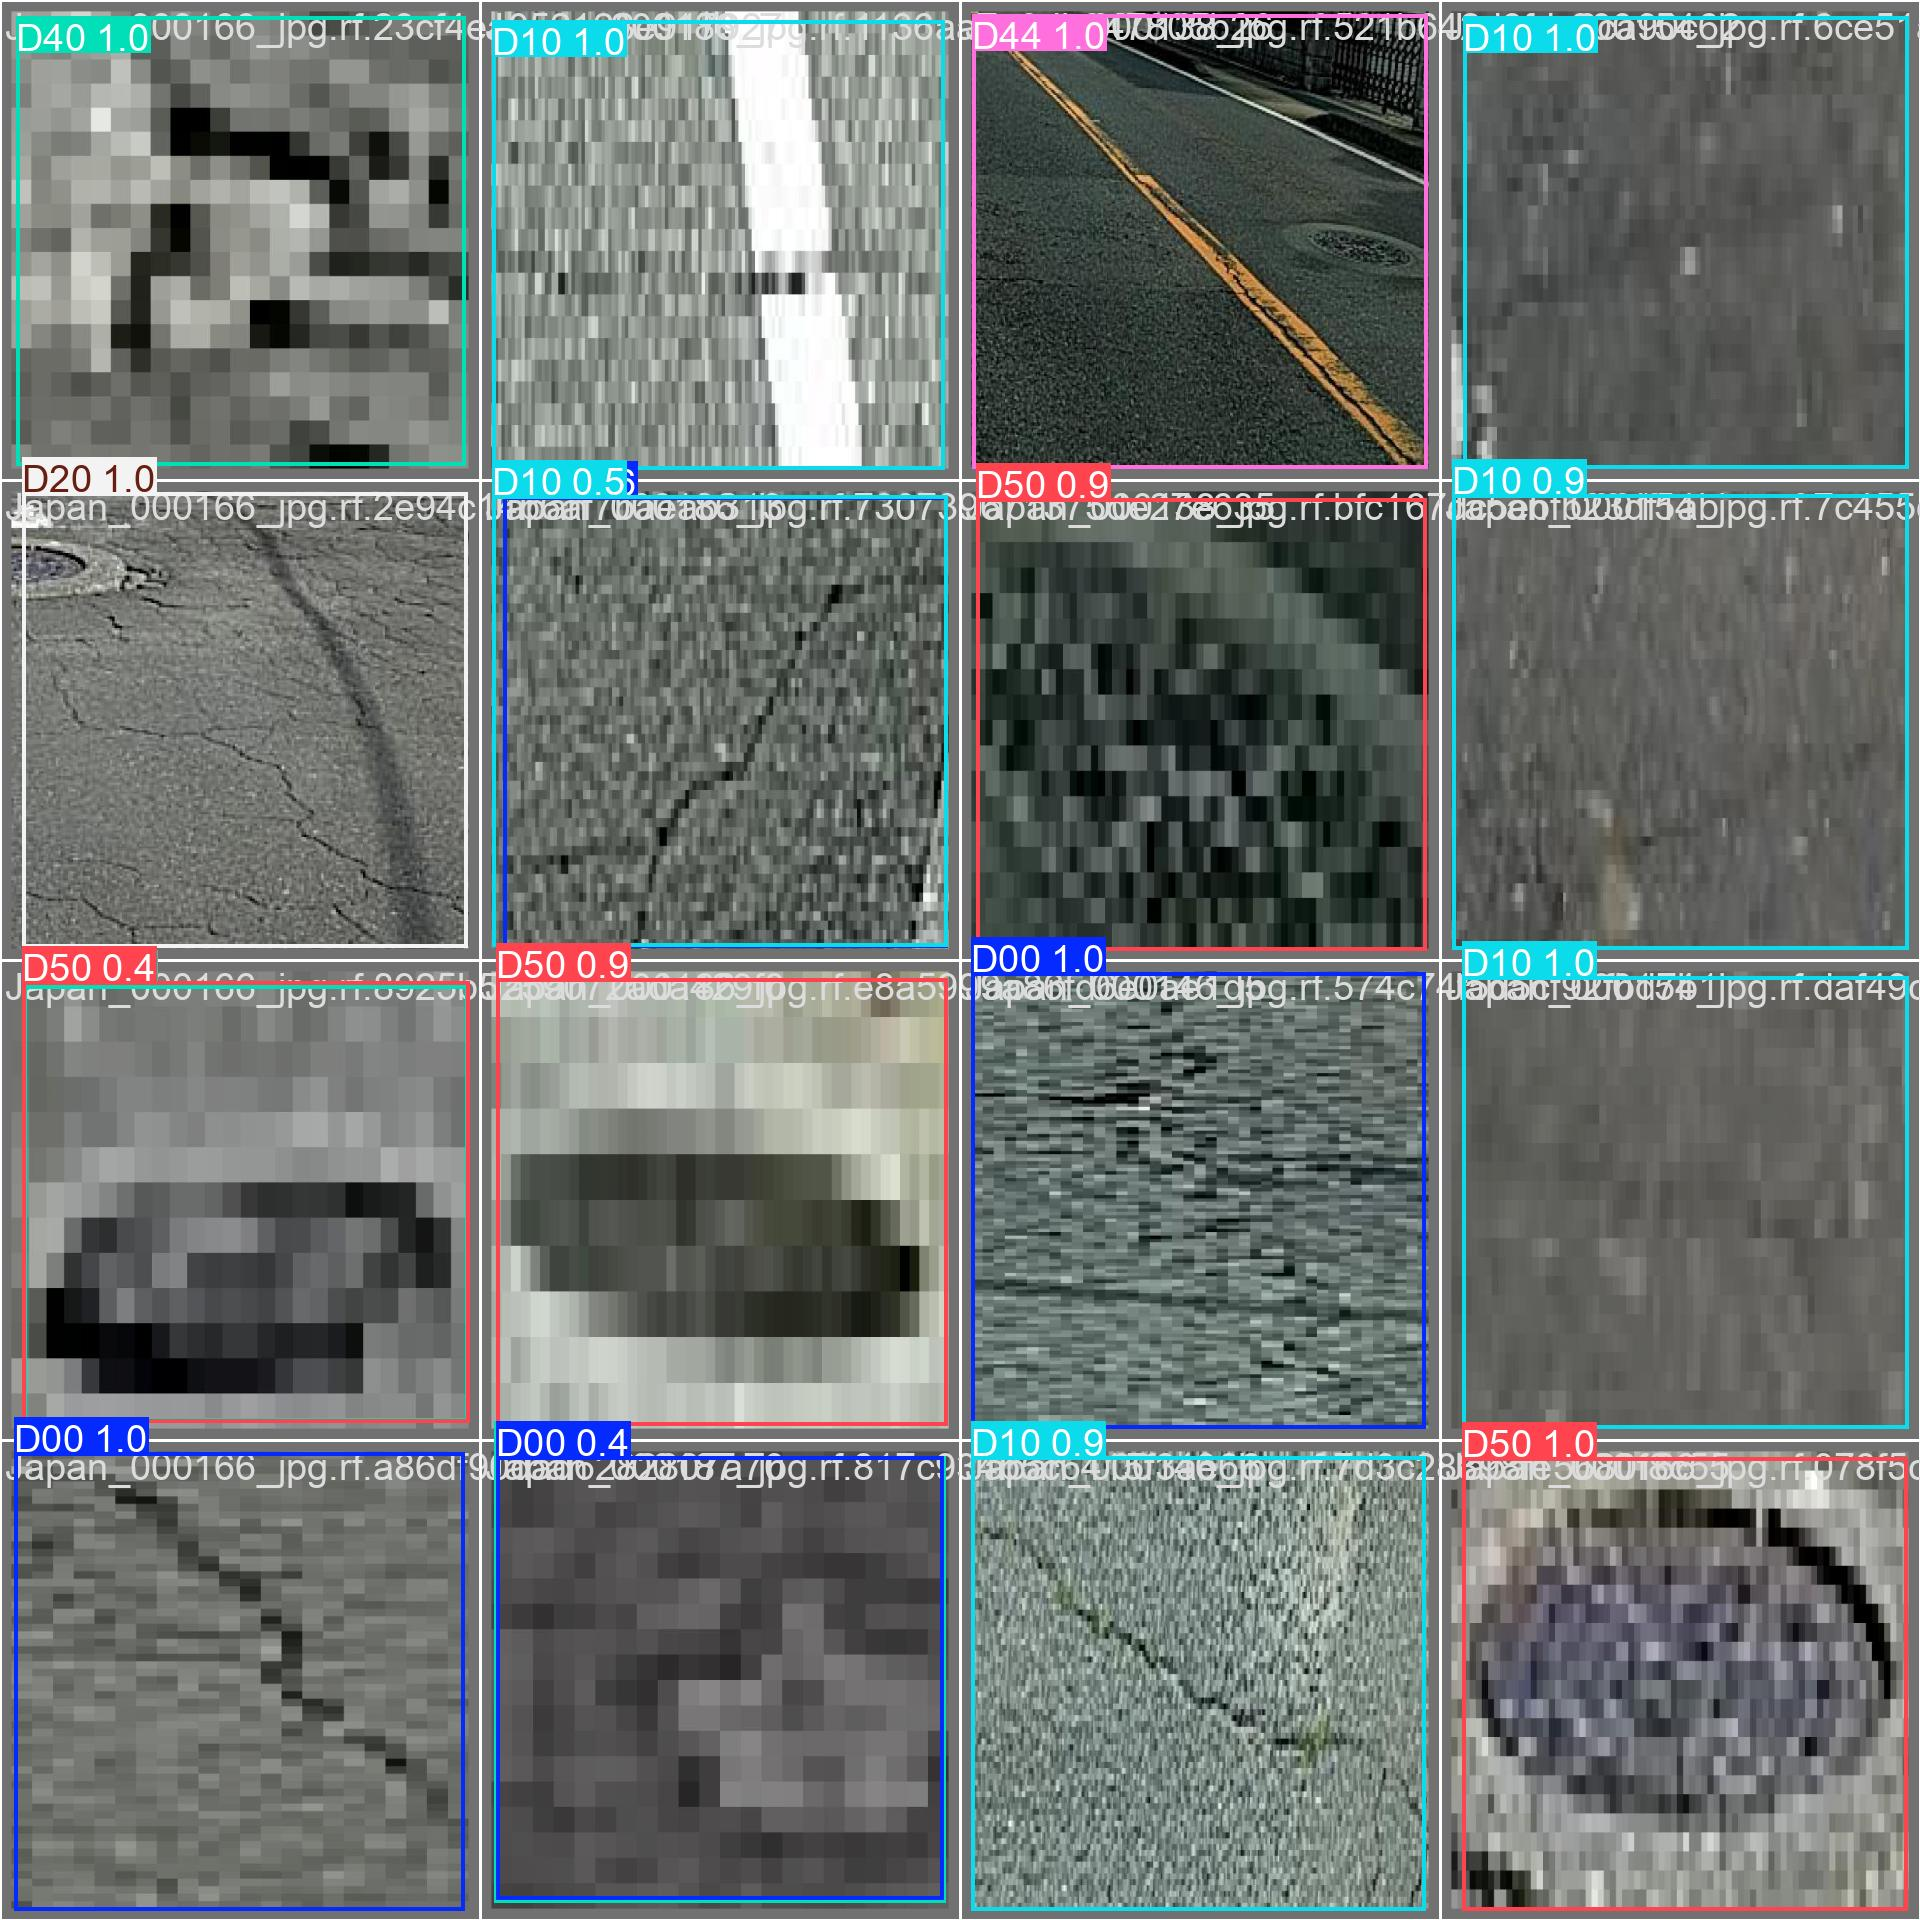

In [18]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

**Step # 06  Validate Fine-Tuned Model**

In [19]:
!yolo task=detect mode=val model={base}/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 101 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1430.3±593.9 MB/s, size: 42.7 KB)
val: Scanning /content/Road-Damages-Detection-7/valid/labels.cache... 689 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 689/689 103.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 6.1it/s 7.2s
                   all        689        689      0.861      0.844      0.925      0.906
                   D00        149        149       0.85      0.797      0.892       0.87
                   D10        102        102      0.946      0.862      0.966      0.952
                   D20        143        143      0.838      0.724      0.875      0.875
                   D40         45         45      0.748      0.724      0.827      0.794
                   D43        

**Step # 07 Inference with Custom Model on Images**

In [20]:
!yolo task=detect mode=predict model={base}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.4.5 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 101 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/402 /content/Road-Damages-Detection-7/test/images/Japan_000002_jpg.rf.5e17da3b46e730f94ab14bfba22b17db.jpg: 640x640 1 D50, 10.1ms
image 2/402 /content/Road-Damages-Detection-7/test/images/Japan_000002_jpg.rf.6b9464b51c2a394f22e0f5e6dd2a96b7.jpg: 640x640 1 D43, 8.5ms
image 3/402 /content/Road-Damages-Detection-7/test/images/Japan_000002_jpg.rf.7f57376a7b822e4a145c4de91786dfd4.jpg: 640x640 1 D50, 8.1ms
image 4/402 /content/Road-Damages-Detection-7/test/images/Japan_000002_jpg.rf.c58e9541f1f90d4dd3c4c2cd679d6fb4.jpg: 640x640 1 D50, 7.9ms
image 5/402 /content/Road-Damages-Detection-7/test/images/Japan_000019_jpg.rf.1738412285387a72a751a2a9489bb9c7.jpg: 640x640 1 D20, 8.6ms
image 6/402 /content/Road-Damages-Detection-7/test/images/Japan_000030_jpg.rf.5d3d4acb6c324127252c3fa0aded999e.jpg: 640x640 1 D43, 1 D44, 8.8ms
image

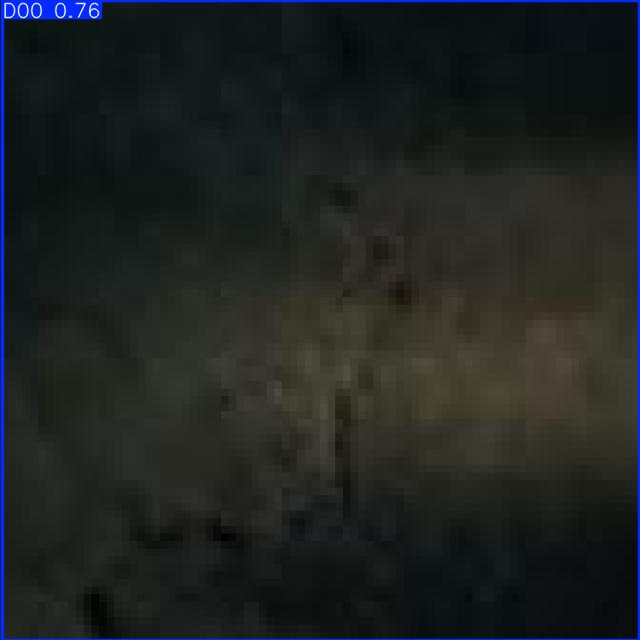

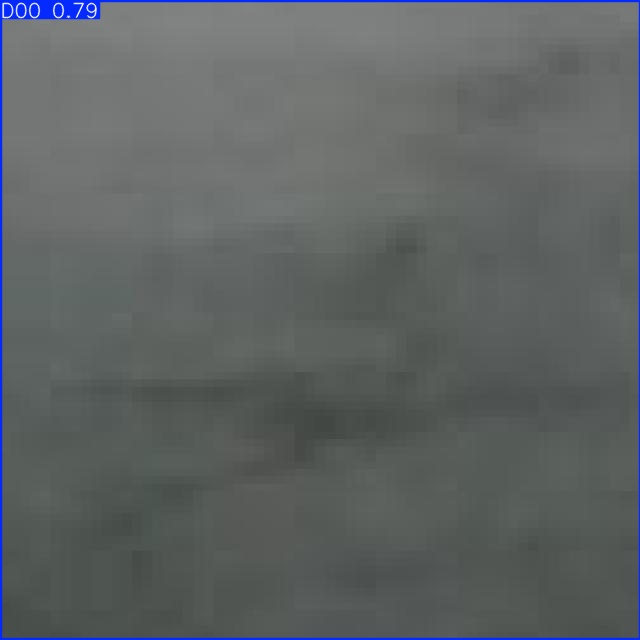

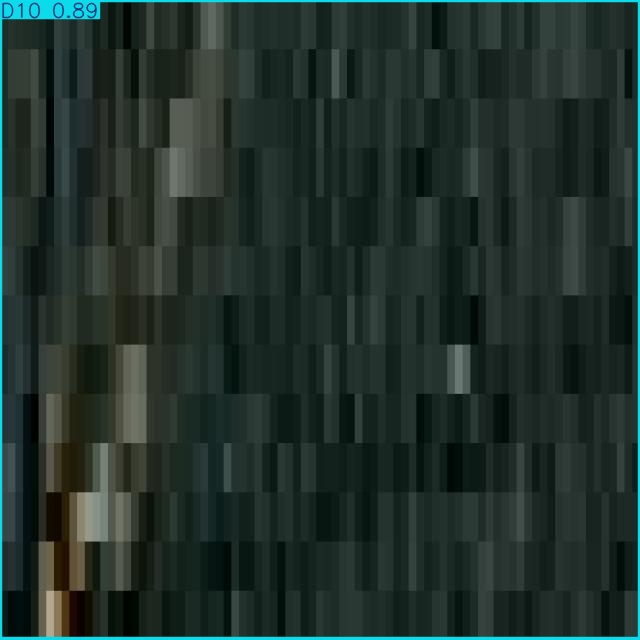

In [21]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [22]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
!zip -r predict_results.zip /content/runs/detect/predict
from google.colab import files
files.download('predict_results.zip')

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Japan_001675_jpg.rf.9d3da98f07de4ee46a37477f87e1f7ed.jpg (deflated 21%)
  adding: content/runs/detect/predict/Japan_001893_jpg.rf.7b9440cd2973e7e4a33d9aeacc78135e.jpg (deflated 31%)
  adding: content/runs/detect/predict/Japan_000918_jpg.rf.d9fc3db46108b05bab891d689da1c237.jpg (deflated 28%)
  adding: content/runs/detect/predict/Japan_000121_jpg.rf.476717f3f53c487a6893e1900f504650.jpg (deflated 22%)
  adding: content/runs/detect/predict/Japan_001790_jpg.rf.4883803e3a46c112ce5e898436627a69.jpg (deflated 23%)
  adding: content/runs/detect/predict/Japan_001302_jpg.rf.b0b08cd151bd1488ce793566a130f1b4.jpg (deflated 4%)
  adding: content/runs/detect/predict/Japan_002117_jpg.rf.8fb35cd07741e7d31f8d01d454c8d6bf.jpg (deflated 5%)
  adding: content/runs/detect/predict/Japan_002474_jpg.rf.1e6b400e0559b5c2b492a1586ca86cfe.jpg (deflated 9%)
  adding: content/runs/detect/predict/Japan_002195_jpg.rf.30612121a4c108

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>